In [1]:
import sys,os,os.path
#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/gluster/data/next/software/IC_satkill/")
#sys.path.append("/gluster/data/next/software/IC_sophronia/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/gluster/data/next/software/IC_satkill/'

sys.path.append('/gluster/data/next/notebooks/john_books/fom_fitting')
import functions as func

import time
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

import IC.invisible_cities.core.core_functions                   as     coref
import IC.invisible_cities.io.dst_io                           as     dstio

import pandas as pd
import numpy  as np
import tables as tb

In [35]:

# satellite killer path
folder_paths = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/isaura/']
tracks = func.collate_ports(folder_paths)



Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87225


In [36]:
import importlib
importlib.reload(func)

<module 'functions' from '/gluster/data/next/notebooks/john_books/fom_fitting/functions.py'>

In [37]:
folder_paths_2 = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_1a/isaura/']
tracks_2 = func.collate_ports(folder_paths_2)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009


No limits applied


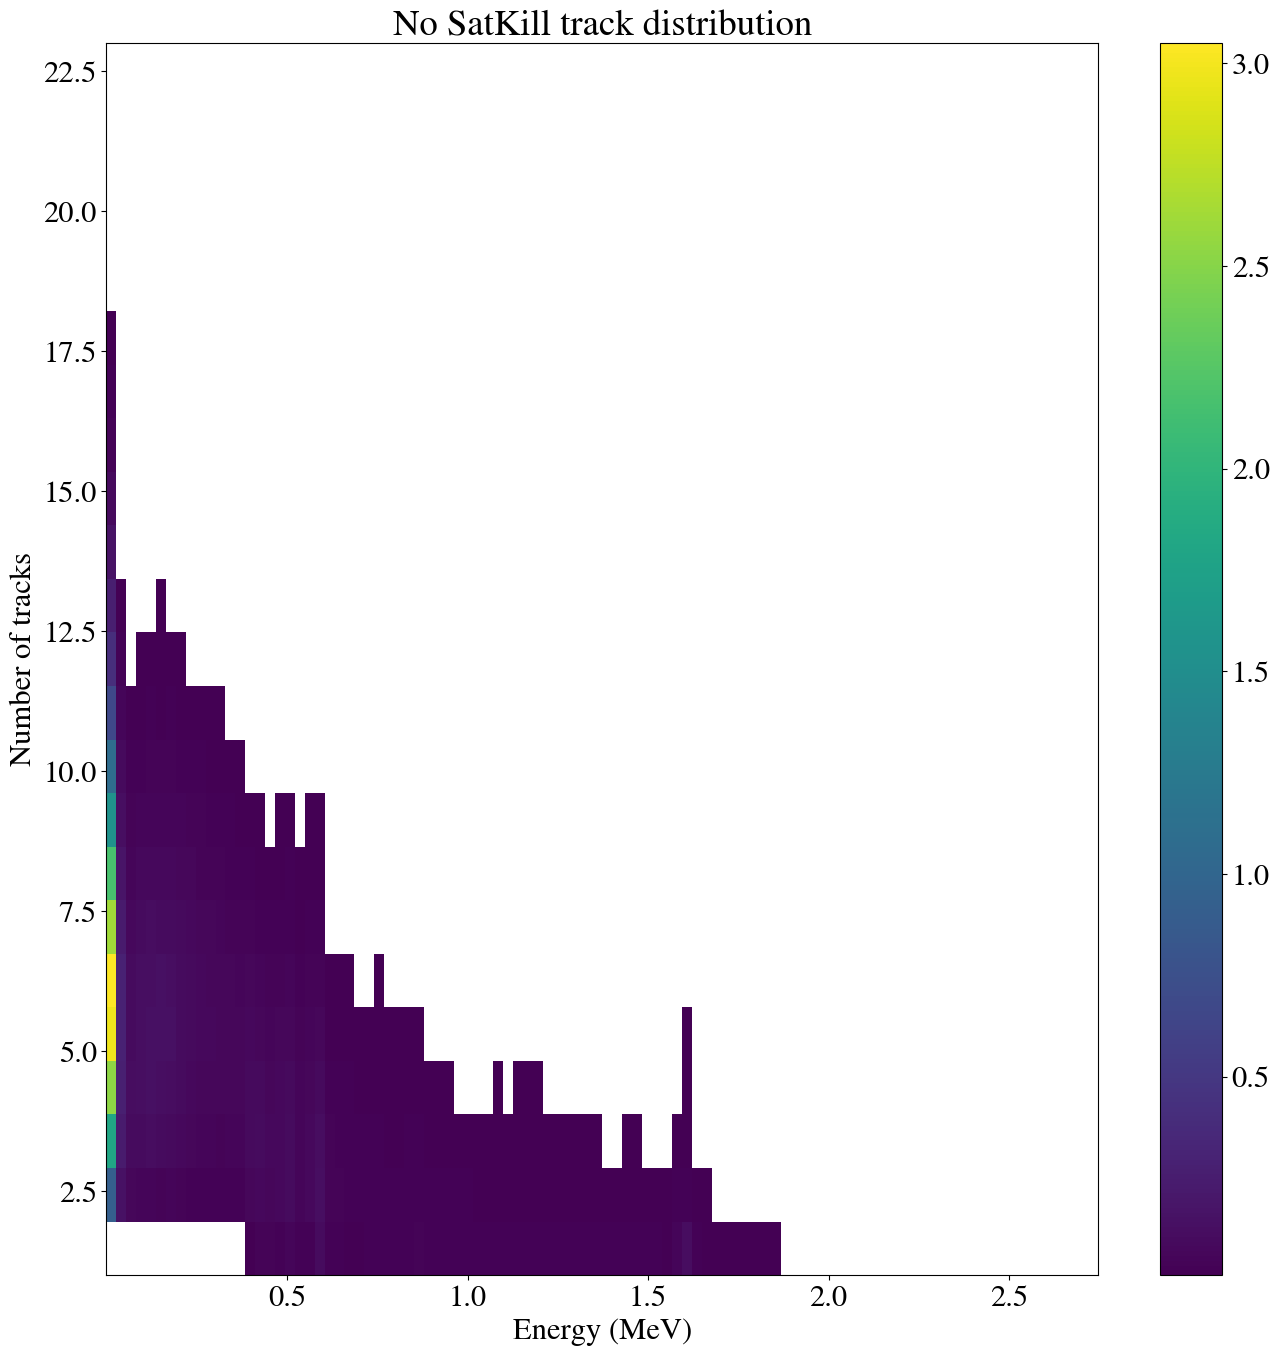

In [38]:
func.energy_track_plots(tracks_2, "No SatKill track distribution", xbins = 100, ybins = np.max(tracks_2.numb_of_tracks.to_numpy()), weight = True, cm = 0.01)

In [39]:
# load in MC topology information
MC_tracks = pd.read_hdf('nsk_sk_distros/MC_topology_info.h5')

In [40]:
display(tracks_2.sort_values(by=['event']))
display(tracks.sort_values(by=['event']))
display(MC_tracks.sort_values(by=['event_id']))

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
216114,0,0,0.431860,51.768867,24,5577,4,341.675,-213.325,776.835872,...,348.904870,-183.292087,785.314452,0.130438,0.103221,0.000000,11.705882,11.842105,11.976448,1a
216115,0,1,0.100071,20.510935,6,1646,4,248.675,-47.325,857.615981,...,254.370191,-31.991190,858.917871,0.098294,0.092600,0.090822,11.705882,11.842105,11.976448,1a
216116,0,2,0.018058,11.842105,2,283,4,212.675,204.675,791.964009,...,218.032977,216.456906,796.094570,0.018058,0.018058,0.018058,11.705882,11.842105,11.976448,1a
216117,0,3,0.000083,0.000000,1,19,4,254.675,1.675,863.614631,...,257.060214,3.733740,863.614631,0.000083,0.000083,0.000083,11.705882,11.842105,11.976448,1a
216123,2,5,0.000090,11.785714,2,13,6,85.675,-102.325,404.030255,...,87.310181,-100.461869,404.030255,0.000090,0.000090,0.000090,11.888889,11.785714,11.957416,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402247,5980688,2,0.033940,11.843750,2,479,5,415.675,222.675,425.928792,...,421.513535,225.902739,426.922072,0.033940,0.033934,0.033934,11.843750,11.444444,11.544708,1a
402248,5980688,3,0.000135,0.000000,1,6,5,179.675,285.675,476.461388,...,180.181015,286.618433,476.461387,0.000135,0.000135,0.000135,11.843750,11.444444,11.544708,1a
402245,5980688,0,0.383014,34.333333,16,3825,5,107.675,245.675,473.541239,...,123.879176,285.363890,477.856047,0.214495,0.119019,0.013286,11.843750,11.444444,11.544708,1a
402246,5980688,1,0.092506,16.255940,3,749,5,403.675,233.675,491.743317,...,408.936068,248.332080,497.327819,0.092506,0.092506,0.092506,11.843750,11.444444,11.544708,1a


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
107357,2,0,1.263277,52.404771,28,2822,8,234.875,-74.425,548.691741,...,273.722678,-53.230131,554.027962,0.661362,0.312234,0.000000,11.684211,11.62069,11.957416,1a
107364,2,7,0.000467,0.000000,1,38,8,82.875,-149.425,406.879988,...,86.026336,-146.631484,406.879988,0.000467,0.000467,0.000467,11.684211,11.62069,11.957416,1a
107363,2,6,0.025475,11.620690,2,63,8,237.875,77.575,529.587713,...,243.134857,85.029544,529.587713,0.025475,0.025475,0.025475,11.684211,11.62069,11.957416,1a
107362,2,5,0.051830,20.360280,3,115,8,194.875,-71.425,542.366803,...,201.064633,-69.318100,542.366803,0.051830,0.051830,0.051830,11.684211,11.62069,11.957416,1a
107358,2,1,0.719844,239.047418,49,1918,8,127.875,-92.425,507.937500,...,204.915721,40.933972,564.840248,0.075176,0.051511,0.000000,11.684211,11.62069,11.957416,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201263,5980684,0,1.584181,265.472409,109,7777,2,215.875,-111.425,642.310659,...,222.298496,-104.911935,658.267637,0.230314,0.104523,0.000000,11.100000,10.87500,11.407183,1a
201264,5980684,1,0.085871,37.289486,11,442,2,203.875,-67.425,679.949747,...,223.470440,-30.510371,686.118431,0.042779,0.039259,0.000000,11.100000,10.87500,11.407183,1a
201266,5980688,1,0.092534,11.000000,2,665,3,403.875,232.575,495.105483,...,408.631159,246.844555,497.171095,0.092534,0.092534,0.092534,11.933333,11.00000,11.544708,1a
201265,5980688,0,0.383207,31.850279,12,3430,3,104.875,254.575,473.541239,...,112.966879,271.741548,484.872096,0.293914,0.238569,0.164180,11.933333,11.00000,11.544708,1a


,event_id,track_ID,track_energy,numb_of_tracks
107304,0,0,0.034545,3
107305,0,1,0.099404,3
107306,0,2,0.410196,3
107307,1,0,0.155421,2
107308,1,1,2.198562,2
...,...,...,...,...
201242,2990341,0,1.386344,3
201245,2990342,0,1.669413,1
201247,2990344,1,0.113237,3
201246,2990344,0,0.381368,3


### Quickly print the diagonal energy plot brais wants.

In [41]:
test = 0

MC_Es = []
sat_Es = []

MC_norms_Ess = []
normal_Ess = []

# just taking the most energetic tracks


for (event, df) in tqdm(MC_tracks.groupby('event_id')):
    # Create X,Y positions for track energy by event ID for MC against satkill, allow multiple inputs if there are multiple inputs
    
    # order by energy, check if they have equal number of tracks in each, then make tuples
    
    df_sort = df.sort_values(by=['track_energy'], ascending=False)
    
    # satellite killer equivalent
    #df_tracks = tracks[tracks.event == event*2]
    #df_tracks = df_tracks.sort_values(by = ['energy'], ascending=False)
    
    # reco equivalent
    RECO_norm = tracks_2[tracks_2.event == event*2]
    RECO_norm = RECO_norm.sort_values(by = ['energy'], ascending=False)
    
    
        #if np.isclose(df_sort.track_energy.sum(), RECO_norm.energy.sum(), atol = 0.01):
    if not (RECO_norm.empty):
        MC_norms_Ess.append(df_sort.iloc[0].track_energy)
        normal_Ess.append(RECO_norm.iloc[0].energy)
        
        
    ##if not (df_tracks.empty):
    #if np.isclose(df_sort.track_energy.sum(), df_tracks.energy.sum(), atol = 0.01):
        
        #print(f"event: {event}")
        #display(df_sort)
        #print(f"Total energy: {df.track_energy.sum()} MeV")

        #display(df_tracks)
        #print(f"Total energy: {df_tracks.energy.sum()} MeV")
        
        ## save the highest energy track from each to compare
     ##   MC_Es.append(df_sort.iloc[0].track_energy)
     ##   sat_Es.append(df_tracks.iloc[0].energy)
        #MC_Es.append(df_sort.track_energy.sum())
        #sat_Es.append(df_tracks.energy.sum())
    

            
        

100%|██████████| 100009/100009 [02:44<00:00, 609.05it/s]


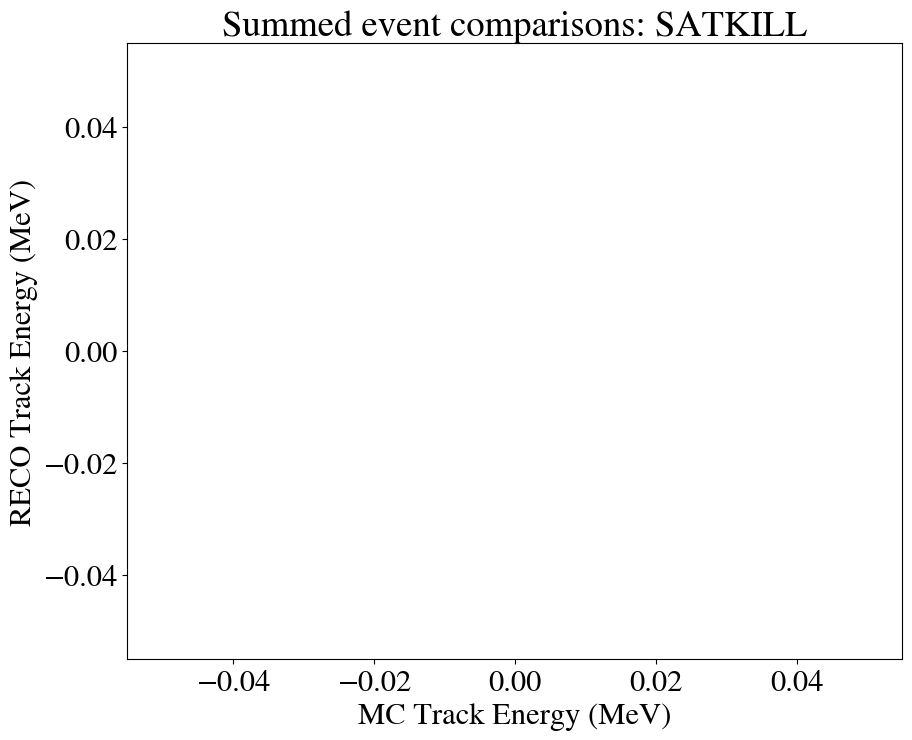

In [42]:
plt.scatter(MC_Es, sat_Es, s = 0.1)
plt.xlabel('MC Track Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Summed event comparisons: SATKILL")
plt.show()

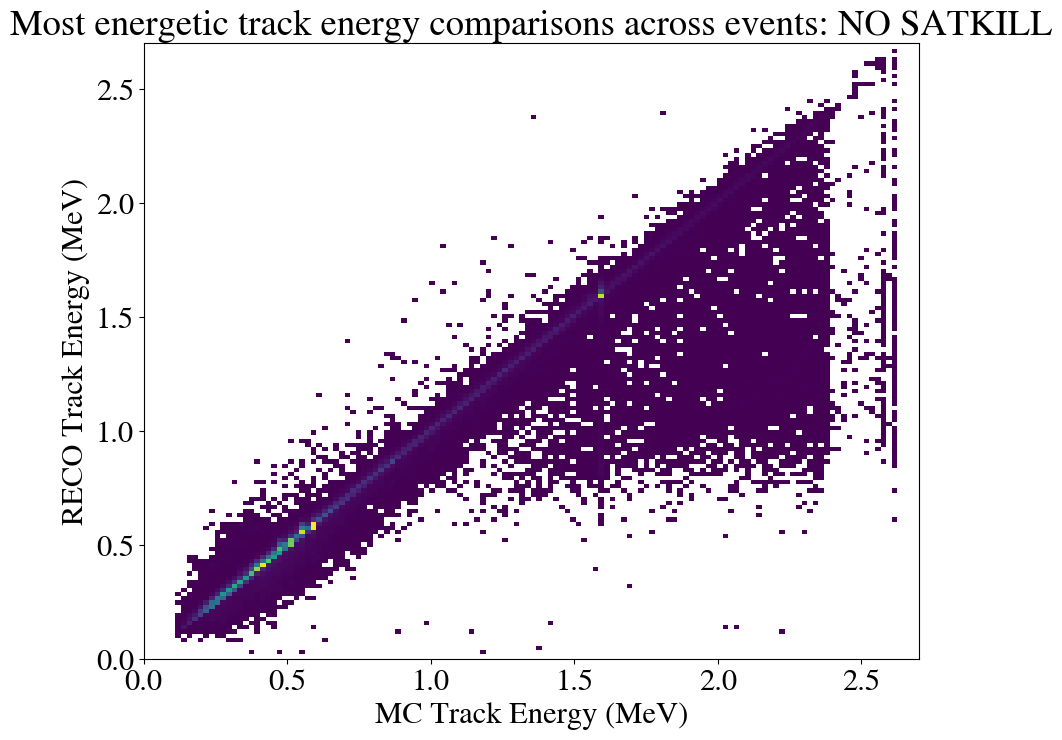

In [43]:
plt.hist2d(MC_norms_Ess, normal_Ess, bins = 150, cmin = 0.001)
plt.xlabel('MC Track Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: NO SATKILL")
plt.xlim([0,2.7])
plt.ylim([0,2.7])
plt.show()

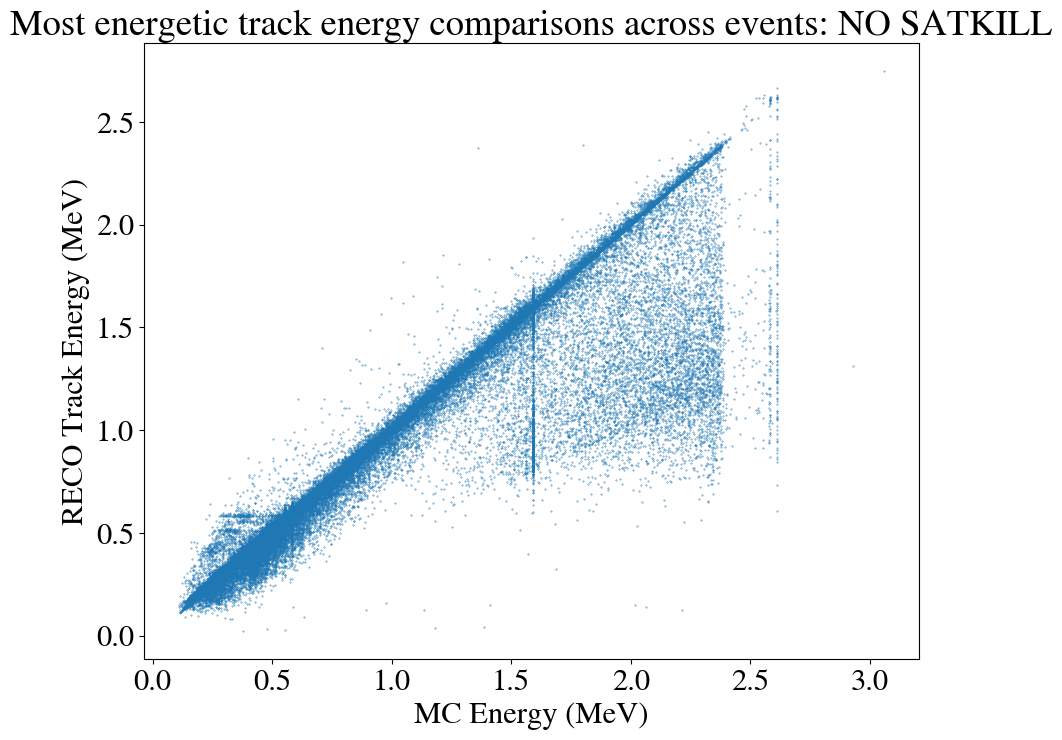

In [44]:
plt.scatter(MC_norms_Ess, normal_Ess, s = 0.1)
plt.xlabel('MC Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: NO SATKILL")
plt.show()

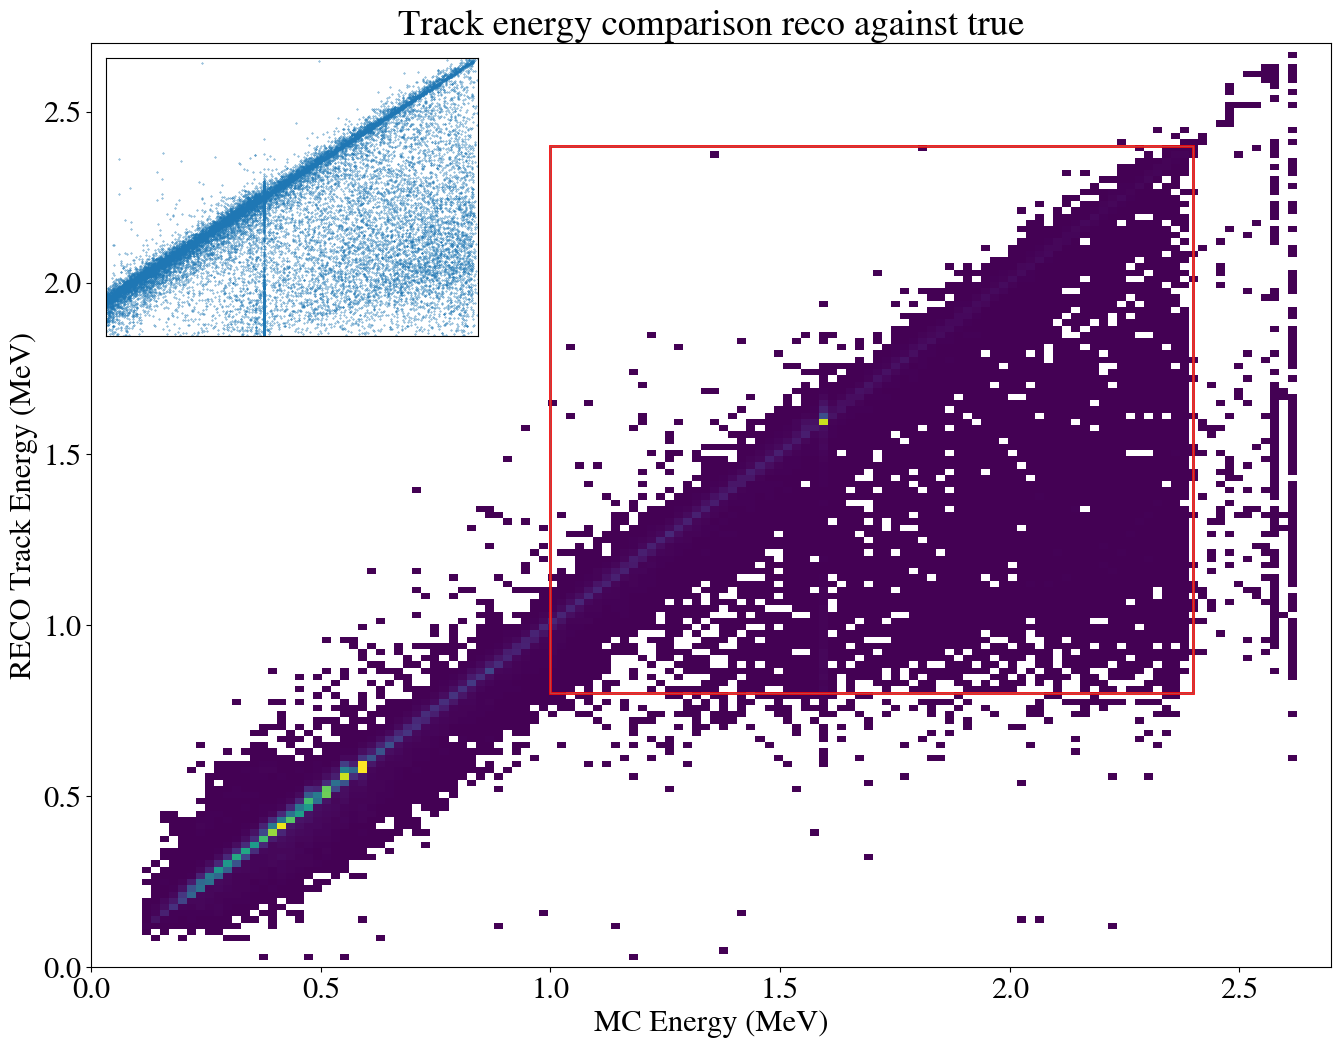

In [62]:
# Create the main figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the main 2D histogram
h_main = ax.hist2d(MC_norms_Ess, normal_Ess, bins = 150, cmin = 0.001)
#plt.colorbar(h_main[3], ax=ax, label='Counts')

# Set the limits for the main plot
ax.set_xlim([0, 2.7])
ax.set_ylim([0, 2.7])

# Define the zoomed-in region
x1, x2, y1, y2 = 1, 2.4, 0.8, 2.4

# Create an inset axis
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper left')

x = np.array(MC_norms_Ess)
y = np.array(normal_Ess)
# Plot the zoomed-in 2D histogram in the inset
mask = (x > x1) & (x < x2) & (y > y1) & (y < y2)
h_inset = ax_inset.scatter(x[mask], y[mask], s = 0.1)


# Set the limits for the inset plot
ax_inset.set_xlim([x1, x2])
ax_inset.set_ylim([y1, y2])
# remove ticks
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Add a rectangle in the main plot to indicate the zoomed area
rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Draw lines to connect the inset with the zoomed region
ax.indicate_inset_zoom(ax_inset)

ax.set_title("Track energy comparison reco against true")
ax.set_xlabel('MC Energy (MeV)')
ax.set_ylabel('RECO Track Energy (MeV)')
# Show the plot
plt.show()

Losing lots of events at the 1.6 MeV point! Regardless of RECO. Lets have a look at the esmeralda track output

In [35]:
folder_paths_es = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/Q_THR4/PORT_1a/esmeralda/']
tracks_es = func.collate_ports(folder_paths_es)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/Q_THR4/PORT_1a/esmeralda/
50
100
150
200
250
300
Done! Tracks available: 100010


In [16]:
display(tracks_es)
display(MC_tracks)
display(tracks)
print(np.sum(tracks_es[tracks_es.event == 0].energy.to_numpy()))
print(f"Total energy: {MC_tracks[MC_tracks.event_id == 0].track_energy.sum()} MeV")


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
0,0,0,0.413653,83.580073,41,115,5,334.325,-225.475,773.807738,...,334.325,-194.375,789.153678,0.042068,0.041119,0.000000,14.635294,14.607576,14.119959,1a
1,0,1,0.099161,35.313135,8,25,5,241.025,-54.425,857.615981,...,241.025,-23.325,863.149036,0.056746,0.027938,0.000000,14.635294,14.607576,14.119959,1a
2,0,2,0.036265,14.635294,2,6,5,209.925,209.925,795.273675,...,225.475,209.925,797.976135,0.036265,0.036265,0.036265,14.635294,14.607576,14.119959,1a
3,0,3,0.000527,0.000000,1,1,5,287.675,7.775,866.526872,...,287.675,7.775,866.526872,0.000527,0.000527,0.000527,14.635294,14.607576,14.119959,1a
4,0,4,0.000466,0.000000,1,1,5,256.575,7.775,863.614631,...,256.575,7.775,863.614631,0.000466,0.000466,0.000466,14.635294,14.607576,14.119959,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537406,5960662,3,0.000430,0.000000,1,1,5,241.025,241.025,677.871994,...,241.025,241.025,677.871994,0.000430,0.000430,0.000430,14.928000,14.994643,14.563609,1a
537407,5960662,4,0.000411,0.000000,1,1,5,287.675,69.975,680.937994,...,287.675,69.975,680.937994,0.000411,0.000411,0.000411,14.928000,14.994643,14.563609,1a
537408,5960664,0,0.470831,58.575206,27,105,1,427.625,-101.075,714.824841,...,458.725,-38.875,728.848912,0.068217,0.067458,0.000000,12.958333,13.328571,12.244608,1a
537409,5960666,0,0.339894,52.170196,21,66,2,334.325,287.675,513.237933,...,334.325,318.775,525.659554,0.078343,0.072936,0.000000,14.809524,13.328571,10.563213,1a


,event_id,track_ID,track_energy,numb_of_tracks
0,80000,0,0.029781,3
1,80000,1,0.055896,3
2,80000,2,0.497511,3
3,80001,0,1.057879,1
4,80002,0,0.182458,4
...,...,...,...,...
201244,2990341,2,0.067689,3
201245,2990342,0,1.669413,1
201246,2990344,0,0.381368,3
201247,2990344,1,0.113237,3


NameError: name 'tracks' is not defined

In [ ]:
tracks_es_duble = tracks_es.copy(deep = True)
tracks_es_duble.energy = tracks_es_duble.energy

In [ ]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks, column = 'energy', binning = 150, title = 'SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'satkill', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()


In [ ]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'no satkill', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()


In [16]:
print(np.max(tracks_es.energy.to_numpy()))
print(np.max(MC_tracks.track_energy.to_numpy()))

2.95818409074025
3.058399346287615


In [17]:
esmer_summed_E = []
MC_summed_E = []

for event, df in tracks_es.groupby('event'):
    esmer_summed_E.append(df.energy.sum())
    
for event, df in MC_tracks.groupby('event_id'):
    MC_summed_E.append(df.track_energy.sum())

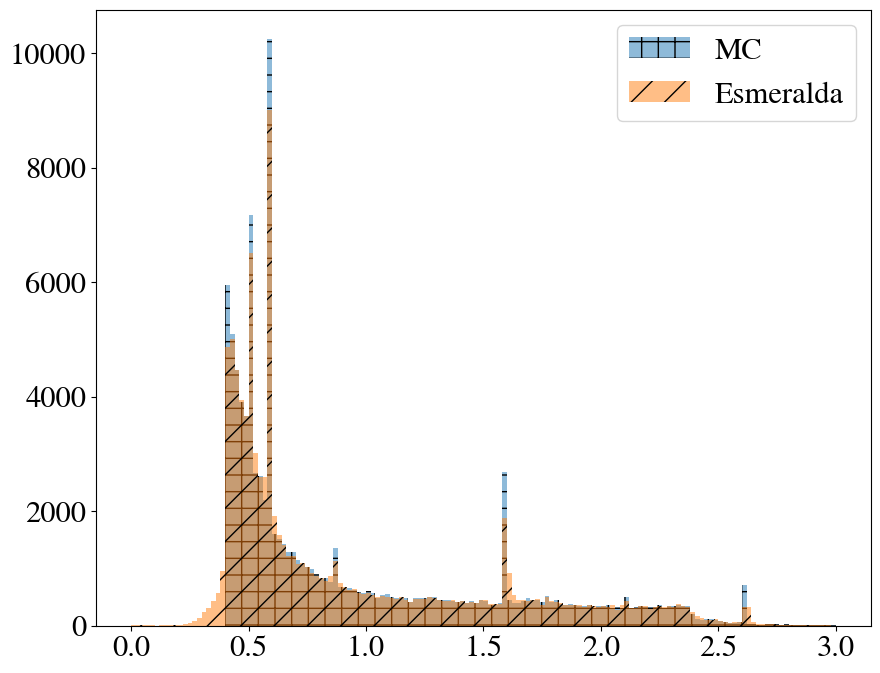

In [18]:
plt.hist(MC_summed_E, bins = 150, label = 'MC', range = [0,3], alpha = 0.5, hatch = '+')
plt.hist(esmer_summed_E, bins = 150, label = 'Esmeralda', range = [0,3], alpha = 0.5, hatch = '/')


plt.legend()
plt.show()

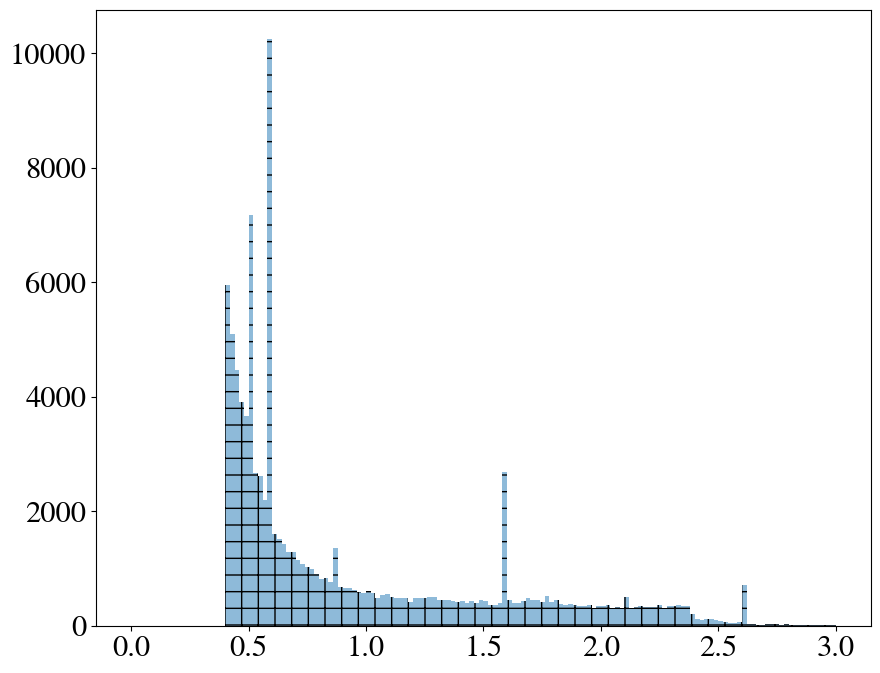

In [19]:
plt.hist(MC_summed_E, bins = 150, label = 'MC', range = [0,3], alpha = 0.5, hatch = '+')
plt.show()

### Select events that are above 1.5 MeV but have incorrect track energies, input MC hit and Beersheba hit information and compare them!

In [20]:
high_E_discrep_evts = []

for (event, df) in tqdm(MC_tracks.groupby('event_id')):
    # order by track energy
    df_sort = df.sort_values(by=['track_energy'], ascending=False)
    
    if df_sort.iloc[0].track_energy > 1.5:
        # check the RECO equivalent
        RECO_track = tracks[tracks.event == event*2]
        RECO_track = RECO_track.sort_values(by=['energy'], ascending=False)
        
        # if they're not close
        try:
            if not (np.isclose(df_sort.iloc[0].track_energy, RECO_track.iloc[0].energy, atol = 0.2)):
                high_E_discrep_evts.append(event)
        except Exception as e: 
            a = 1
            #print(e)
            


100%|██████████| 100009/100009 [01:40<00:00, 995.90it/s]


### using some older code to collect a new df of these fucked files

In [21]:
def collect_soph_signal_df(data_path, event_ids, save_path = "", MC_check = True):
    '''

    Function that collects all sophronia signal events and stores them in a file

    This will produce a dataframe with all the 'RECO/Events' data
    for the relevant events.

    data_path -> path to the sophronia files
    event_ids -> array including all the event ids
    save_path -> path under which to save the data
    MC_check  -> check if the event ids are from MC, if so, they are doubled
    '''

    if MC_check == True:
        event_ids = np.array(event_ids) * 2
        print("MC check done")
        # collect all filenames
    try:
        file_names = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.endswith('.h5')]
    except:
        print("File path incorrect, please state the correct file path\n(but not any particular folder!)")

    # counter for creating first array
    i = 0

    #

    for file in tqdm(file_names):
        file_path = data_path + file

        # load in data
        soph_df = dstio.load_dst(file_path, 'DECO', 'Events')
        
        # set first dataframe
        if (i == 0):
            soph_signal_df = pd.DataFrame(columns = soph_df.columns.values)
            i = 1

        
        # collect unique event ids from file, and then find how many are signals 
        ids = np.array(soph_df.event.unique())
        available_evts = np.intersect1d(ids, event_ids)

        # collect the signal events from the files
        for q in available_evts:
            soph_signal_df = pd.concat([soph_signal_df, soph_df[soph_df.event == q]])
    
        # save if desired
    if save_path != "":
        soph_signal_df.to_hdf(str(save_path) + 'Tl_signal_soph.h5', key = 'MC')

    return soph_signal_df






# develop a function that can load in files, collect them like this, and add to a large dataframe.
def collect_signal_df(data_path, event_ids, save_path = "", verbose = True):
    """
    Function that collects Tl208 signal events (identified with Xe ions created in 'conv' processes)
    """

     # collect all filenames
    try:
        file_names = [f for f in os.listdir(data_path) if os.path.isfile(os.path.join(data_path, f)) and f.endswith('.h5')]
    except:
        print("File path incorrect, please state the correct file path\n(but not any particular folder!)")

    # counter for creating first array
    i = 0


    for file in tqdm(file_names):
        file_path = data_path + file

        # load in data
        MC_df = pd.read_hdf(file_path, 'MC/hits')
        
        # set first dataframe
        if (i == 0):
            MC_signal_df = pd.DataFrame(columns = MC_df.columns.values)
            i = 1
        
        
                # collect unique event ids from file, and then find how many are signals 
        ids = np.array(MC_df.event_id.unique())
        available_evts = np.intersect1d(ids, event_ids*2)
        # collect the signal events from the files
        for q in available_evts:
            #display(MC_df[MC_df.event_id == i])
            MC_signal_df = pd.concat([MC_signal_df, MC_df[MC_df.event_id == q]])
        # collect conv slice and iterate over, scanning for Xe*** events
        #conv_slice = MC_df[MC_df.creator_proc == 'conv']
        #for e_id, df in conv_slice.groupby('event_id'):
        #    # check if conv selection has Xe isotope
        #    lst = df.particle_name.to_list()
        #    # truncate to only take 'Xe' as the input
        #    short_lst = []
        #    [short_lst.append(i[0:2]) for i in lst]
        #    if "Xe" in short_lst:
        #        if (verbose == True):
        #            display(df)
        #            print("Xe found in event {}".format(e_id))
        #        MC_signal_df = pd.concat([MC_signal_df, MC_df[MC_df.event_id == e_id]])

    # save if desired
    if save_path != "":
        MC_signal_df.to_hdf(str(save_path) + 'Tl_signal.h5', key = 'MC')

    # return dataframe    
    return MC_signal_df


In [22]:
soph_hits = collect_soph_signal_df('/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/beersheba/', high_E_discrep_evts, save_path = '/gluster/data/next/notebooks/john_books/dodgy_high_E/', MC_check = True)


MC check done


 25%|██▍       | 74/300 [21:41<1:06:15, 17.59s/it]


KeyboardInterrupt: 

In [ ]:
MC_hits = collect_signal_df('/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/beersheba/', high_E_discrep_evts, save_path = '/gluster/data/next/notebooks/john_books/dodgy_high_E/')

In [ ]:
display(MC_hits.sort_values(by=['event_id']))
display(soph_hits.sort_values(by=['event']))

In [ ]:
print(high_E_discrep_evts[:15])

In [ ]:
print(np.sort(soph_hits.event.unique())[:10])
print(np.array(high_E_discrep_evts[:10]) *2)

In [ ]:
print(np.sort(MC_hits.event_id.unique())[:10])

In [23]:
# load in the files
soph_hits = pd.read_hdf('dodgy_high_E/Tl_signal_soph.h5')
MC_hits = pd.read_hdf('dodgy_high_E/Tl_signal.h5')

In [24]:
display(soph_hits.sort_values(by = ['event']))
display(MC_hits.sort_values(by = ['event_id']))

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,nsipm,Xrms,Yrms
200138,50,0.0,420.875,53.575,944.486878,0.000025,437.304215,75.445681,5.035278e+07,0,0,0
199324,50,0.0,440.875,91.575,941.447325,0.000066,437.304215,75.445681,5.035278e+07,0,0,0
199325,50,0.0,440.875,92.575,941.447325,0.000063,437.304215,75.445681,5.035278e+07,0,0,0
199326,50,0.0,440.875,93.575,941.447325,0.000056,437.304215,75.445681,5.035278e+07,0,0,0
199327,50,0.0,440.875,94.575,941.447325,0.000051,437.304215,75.445681,5.035278e+07,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1116525,2980312,0.0,-283.125,-148.425,556.849519,0.000217,-291.563552,-125.242070,2.980313e+12,0,0,0
1116526,2980312,0.0,-283.125,-147.425,556.849519,0.000202,-291.563552,-125.242070,2.980313e+12,0,0,0
1116527,2980312,0.0,-283.125,-146.425,556.849519,0.000185,-291.563552,-125.242070,2.980313e+12,0,0,0
1116517,2980312,0.0,-283.125,-156.425,556.849519,0.000238,-291.563552,-125.242070,2.980313e+12,0,0,0


,event_id,particle_id,hit_id,x,y,z,time,energy,label
171,1,29,0,288.074402,175.287155,523.388184,0.830899,0.000235,ACTIVE
773,1,30,555,244.676590,-64.134758,554.585571,2.719224,0.001527,ACTIVE
774,1,30,556,245.619186,-64.287262,554.362854,2.722823,0.003369,ACTIVE
775,1,30,557,246.549728,-64.201958,554.659363,2.726424,0.008096,ACTIVE
776,1,30,558,247.493164,-64.066689,554.887512,2.730029,0.001377,ACTIVE
...,...,...,...,...,...,...,...,...,...
106720,2990328,53,312,9.597732,210.045090,269.681641,2.185423,0.001642,ACTIVE
106721,2990328,53,313,8.730350,210.440140,269.382233,2.188876,0.002505,ACTIVE
106722,2990328,53,314,7.861794,210.859940,269.119690,2.192332,0.002004,ACTIVE
106710,2990328,53,302,18.235723,206.167847,272.814362,2.150894,0.001544,ACTIVE


In [25]:
display(soph_hits[soph_hits.event == 50])
display(MC_hits[MC_hits.event_id == 25])

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,nsipm,Xrms,Yrms
197675,50,0.0,427.875,65.575,935.326941,0.000019,437.304215,75.445681,5.035278e+07,0,0,0
197676,50,0.0,428.875,64.575,935.326941,0.000022,437.304215,75.445681,5.035278e+07,0,0,0
197677,50,0.0,428.875,65.575,935.326941,0.000024,437.304215,75.445681,5.035278e+07,0,0,0
197678,50,0.0,428.875,66.575,935.326941,0.000024,437.304215,75.445681,5.035278e+07,0,0,0
197679,50,0.0,428.875,67.575,935.326941,0.000022,437.304215,75.445681,5.035278e+07,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
205496,50,0.0,411.875,71.575,963.121359,0.000020,437.304215,75.445681,5.035278e+07,0,0,0
205497,50,0.0,412.875,69.575,963.121359,0.000022,437.304215,75.445681,5.035278e+07,0,0,0
205498,50,0.0,412.875,70.575,963.121359,0.000023,437.304215,75.445681,5.035278e+07,0,0,0
205499,50,0.0,412.875,71.575,963.121359,0.000020,437.304215,75.445681,5.035278e+07,0,0,0


,event_id,particle_id,hit_id,x,y,z,time,energy,label


### Same plots, new data

- relative threshold beersheba + satellite killer
- beersheba with new patch
- beersheba + patch + satellite killer

In [70]:
folder_paths_relative = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_1a/isaura/']
tracks_2 = func.collate_ports(folder_paths_relative)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_1a/isaura/
50
100


KeyboardInterrupt: 

In [ ]:
func.energy_track_plots(tracks_2, "Relative e_cut -  SatKill track distribution", xbins = 100, ybins = np.max(tracks_2.numb_of_tracks.to_numpy()), weight = True, cm = 0.01)

In [ ]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
#func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Relative e_cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'rel_ecut', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()

In [ ]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
#func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Relative e_cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'post-fix', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()

In [21]:
test = 0

MC_Es = []
sat_Es = []

MC_norms_Es = []
normal_Es = []

# just taking the most energetic tracks


for (event, df) in tqdm(MC_tracks.groupby('event_id')):
    # Create X,Y positions for track energy by event ID for MC against satkill, allow multiple inputs if there are multiple inputs
    
    # order by energy, check if they have equal number of tracks in each, then make tuples
    
    df_sort = df.sort_values(by=['track_energy'], ascending=False)
    
    # satellite killer equivalent
    #df_tracks = tracks[tracks.event == event*2]
    #df_tracks = df_tracks.sort_values(by = ['energy'], ascending=False)
    
    # reco equivalent
    RECO_norm = tracks_2[tracks_2.event == event*2]
    RECO_norm = RECO_norm.sort_values(by = ['energy'], ascending=False)
    
    #if np.isclose(df_sort.track_energy.sum(), df_tracks.energy.sum(), atol = 0.01):
        
        #print(f"event: {event}")
        #display(df_sort)
        #print(f"Total energy: {df.track_energy.sum()} MeV")

        #display(df_tracks)
        #print(f"Total energy: {df_tracks.energy.sum()} MeV")
        
        ## save the highest energy track from each to compare
    #    MC_Es.append(df_sort.iloc[0].track_energy)
    #    sat_Es.append(df_tracks.iloc[0].energy)
    
    #if np.isclose(df_sort.track_energy.sum(), RECO_norm.energy.sum(), atol = 0.01):
    if not (RECO_norm.empty):
        MC_norms_Es.append(df_sort.iloc[0].track_energy)
        normal_Es.append(RECO_norm.iloc[0].energy)
        #MC_norms_Es.append(df_sort.track_energy.sum())
        #normal_Es.append(RECO_norm.energy.sum())
            
        

100%|██████████| 100009/100009 [02:37<00:00, 633.37it/s]


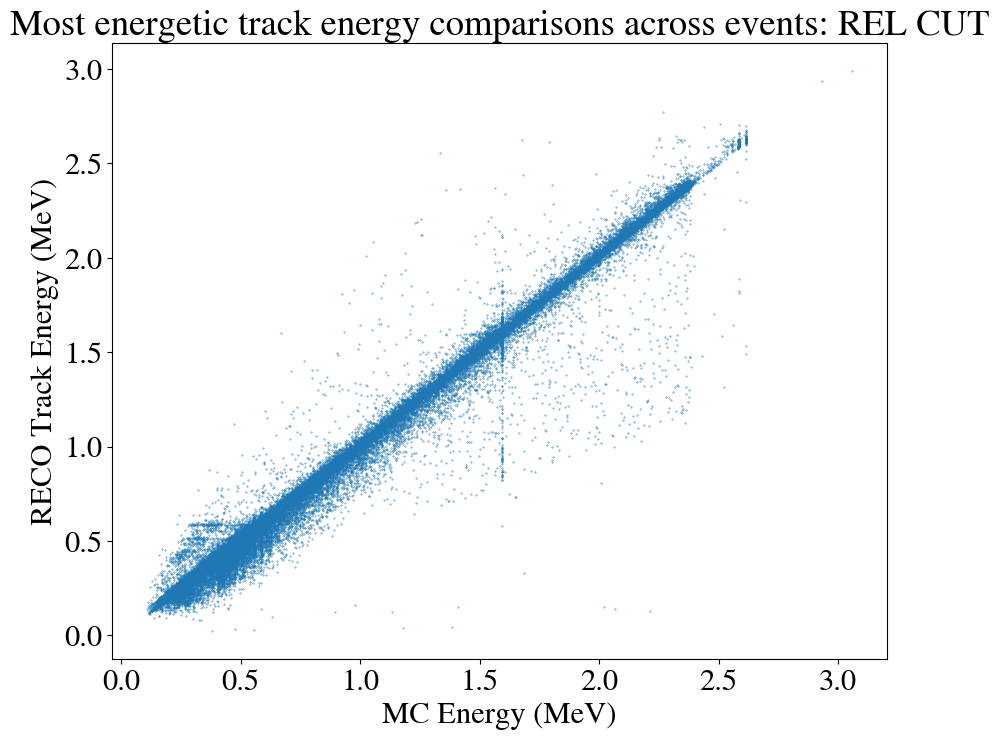

In [22]:
#x = np.linspace(0,2, 1000)
#y = np.linspace(0,2, 1000)
#plt.plot(x,y, label = 'X/Y = 1')
plt.scatter(MC_norms_Es, normal_Es, s = 0.1)
plt.xlabel('MC Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
#plt.title("Summed event comparisons: REL CUT")
plt.title("Most energetic track energy comparisons across events: REL CUT")

plt.show()

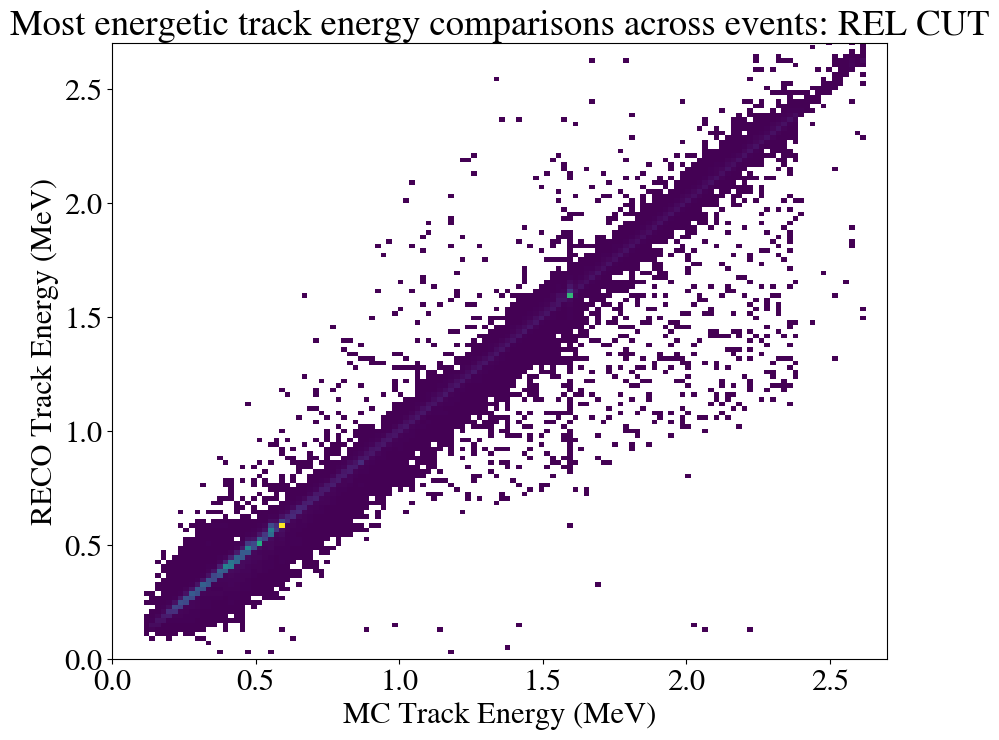

In [23]:
plt.hist2d(MC_norms_Es, normal_Es, bins = 150, cmin = 0.001)
plt.xlabel('MC Track Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: REL CUT")
plt.xlim([0,2.7])
plt.ylim([0,2.7])
plt.show()

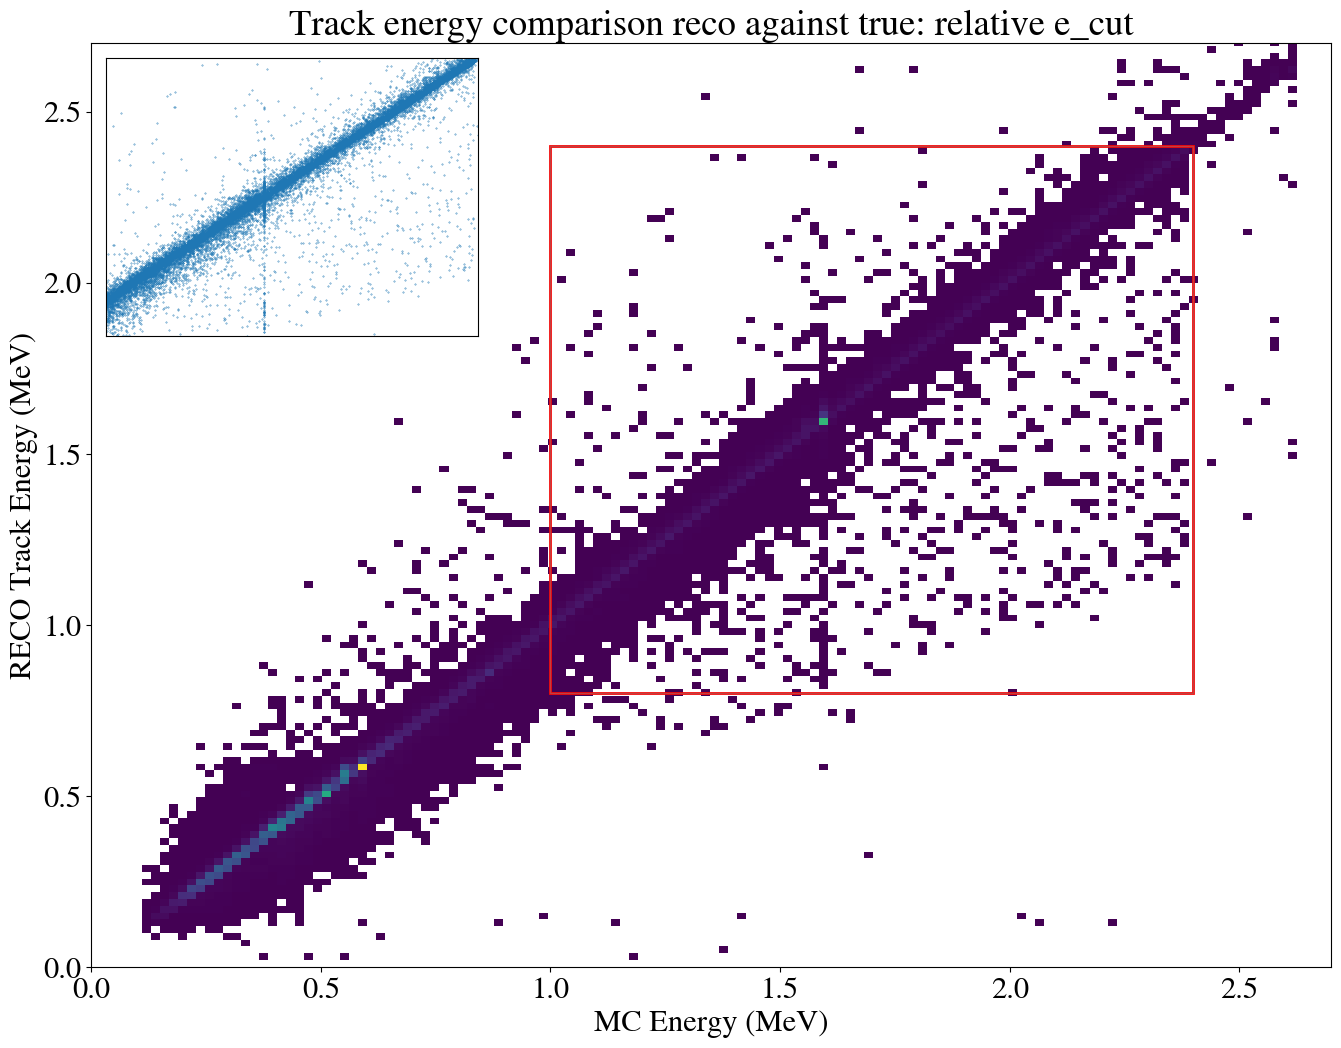

In [63]:
# Create the main figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the main 2D histogram
h_main = ax.hist2d(MC_norms_Es, normal_Es, bins = 150, cmin = 0.001)
#plt.colorbar(h_main[3], ax=ax, label='Counts')

# Set the limits for the main plot
ax.set_xlim([0, 2.7])
ax.set_ylim([0, 2.7])

# Define the zoomed-in region
x1, x2, y1, y2 = 1, 2.4, 0.8, 2.4

# Create an inset axis
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper left')

x = np.array(MC_norms_Es)
y = np.array(normal_Es)
# Plot the zoomed-in 2D histogram in the inset
mask = (x > x1) & (x < x2) & (y > y1) & (y < y2)
h_inset = ax_inset.scatter(x[mask], y[mask], s = 0.1)


# Set the limits for the inset plot
ax_inset.set_xlim([x1, x2])
ax_inset.set_ylim([y1, y2])
# remove ticks
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Add a rectangle in the main plot to indicate the zoomed area
rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Draw lines to connect the inset with the zoomed region
ax.indicate_inset_zoom(ax_inset)

ax.set_title("Track energy comparison reco against true: relative e_cut")
ax.set_xlabel('MC Energy (MeV)')
ax.set_ylabel('RECO Track Energy (MeV)')
# Show the plot
plt.show()

### satellite killer patch

In [42]:
folder_paths_patch = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/new_5e-3/PORT_1a/isaura/']
tracks_2 = func.collate_ports(folder_paths_patch)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/new_5e-3/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009


No limits applied


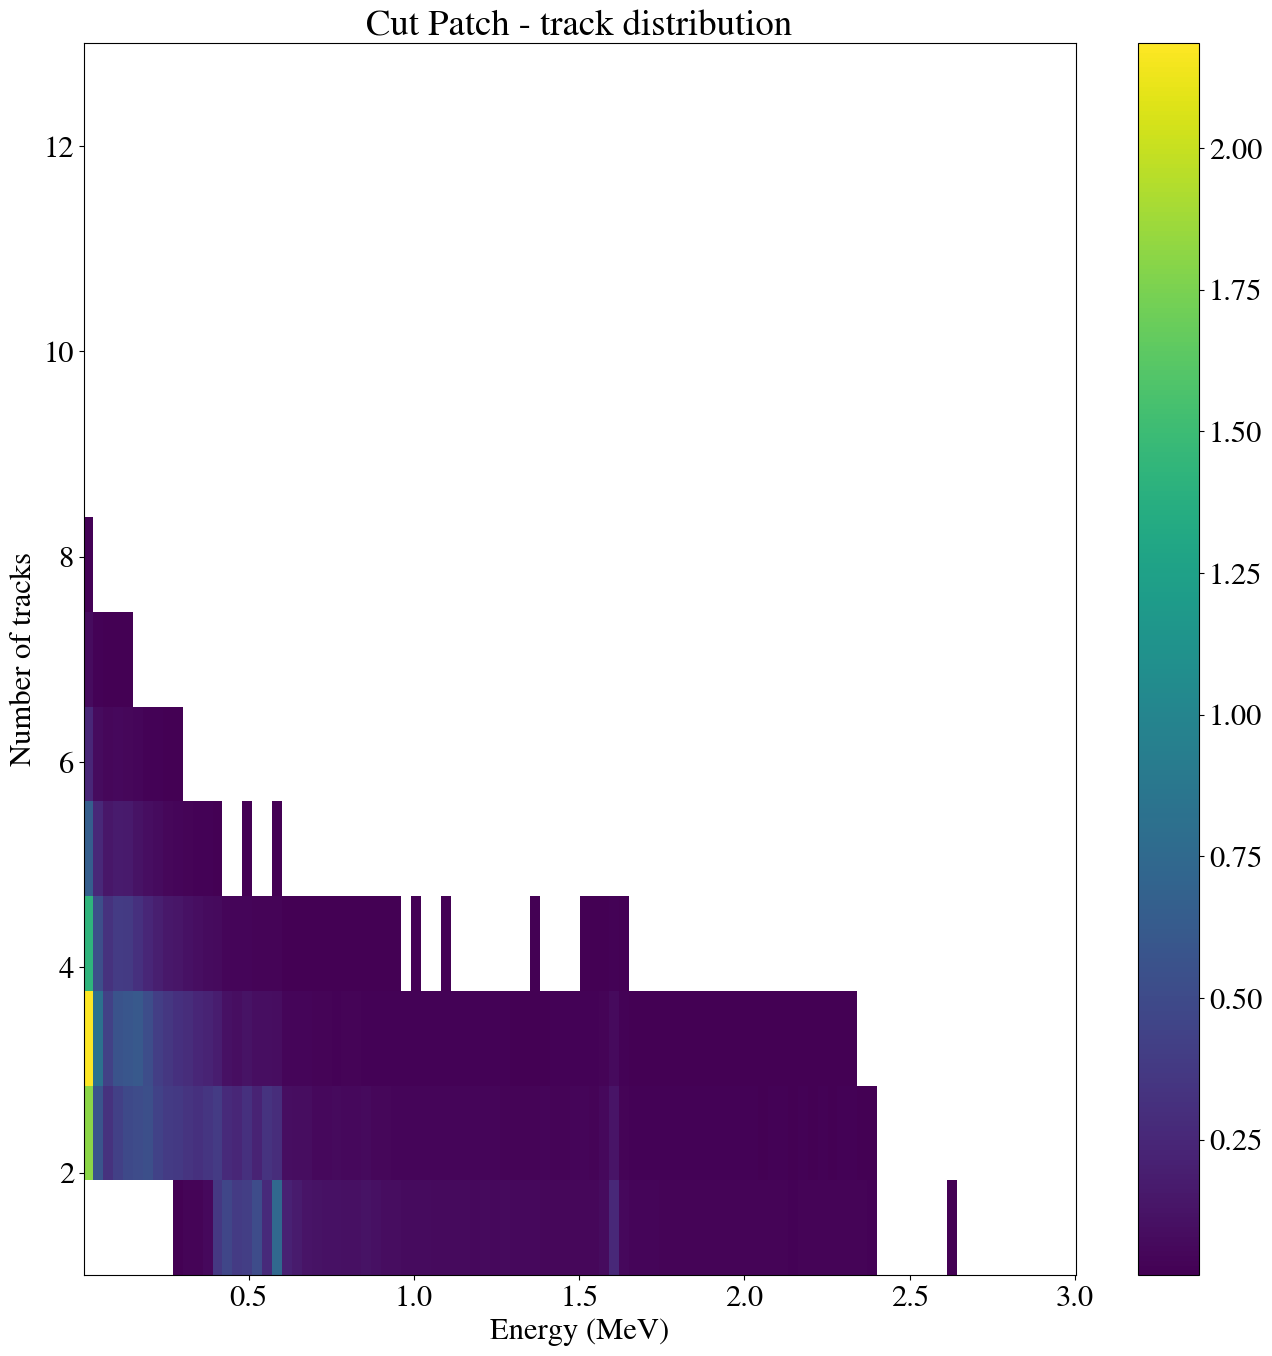

In [43]:
func.energy_track_plots(tracks_2, "Cut Patch - track distribution", xbins = 100, ybins = np.max(tracks_2.numb_of_tracks.to_numpy()), weight = True, cm = 0.01)

NameError: name 'tracks_es_duble' is not defined

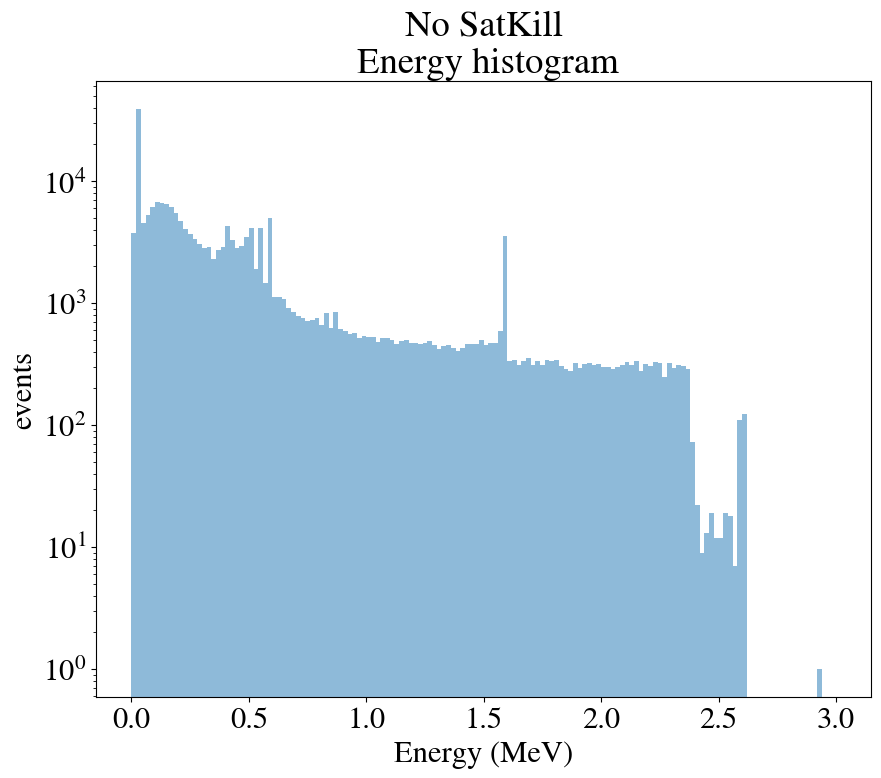

In [44]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'new e_cut patch\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'patch', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()

In [ ]:
test = 0

MC_Es = []
sat_Es = []

MC_norms_Es = []
normal_Es = []

# just taking the most energetic tracks


for (event, df) in tqdm(MC_tracks.groupby('event_id')):
    # Create X,Y positions for track energy by event ID for MC against satkill, allow multiple inputs if there are multiple inputs
    
    # order by energy, check if they have equal number of tracks in each, then make tuples
    
    df_sort = df.sort_values(by=['track_energy'], ascending=False)
    
    # satellite killer equivalent
    #df_tracks = tracks[tracks.event == event*2]
    #df_tracks = df_tracks.sort_values(by = ['energy'], ascending=False)
    
    # reco equivalent
    RECO_norm = tracks_2[tracks_2.event == event*2]
    RECO_norm = RECO_norm.sort_values(by = ['energy'], ascending=False)
    
    #if np.isclose(df_sort.track_energy.sum(), df_tracks.energy.sum(), atol = 0.01):
        
        #print(f"event: {event}")
        #display(df_sort)
        #print(f"Total energy: {df.track_energy.sum()} MeV")

        #display(df_tracks)
        #print(f"Total energy: {df_tracks.energy.sum()} MeV")
        
        ## save the highest energy track from each to compare
    #    MC_Es.append(df_sort.iloc[0].track_energy)
    #    sat_Es.append(df_tracks.iloc[0].energy)
    
    #if np.isclose(df_sort.track_energy.sum(), RECO_norm.energy.sum(), atol = 0.01):
    if not (RECO_norm.empty):
        MC_norms_Es.append(df_sort.iloc[0].track_energy)
        normal_Es.append(RECO_norm.iloc[0].energy)
        #MC_norms_Es.append(df_sort.track_energy.sum())
        #normal_Es.append(RECO_norm.energy.sum())
            
            

In [ ]:
plt.scatter(MC_norms_Es, normal_Es, s = 0.1)
plt.xlabel('MC Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: PATCH")
#plt.title("Summed event comparisons: PATCH CUT")
plt.show()

In [ ]:
plt.hist2d(MC_norms_Es, normal_Es, bins = 150, cmin = 0.001)
plt.xlabel('MC Track Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: PATCH")
plt.xlim([0,2.7])
plt.ylim([0,2.7])
plt.show()

### PATCH WITH SATELLITE KILLER

In [64]:
folder_paths_patch = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/patch_satkill_5e-5/PORT_1a/isaura/']
tracks_2 = func.collate_ports(folder_paths_patch)



Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/patch_satkill_5e-5/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009


No limits applied


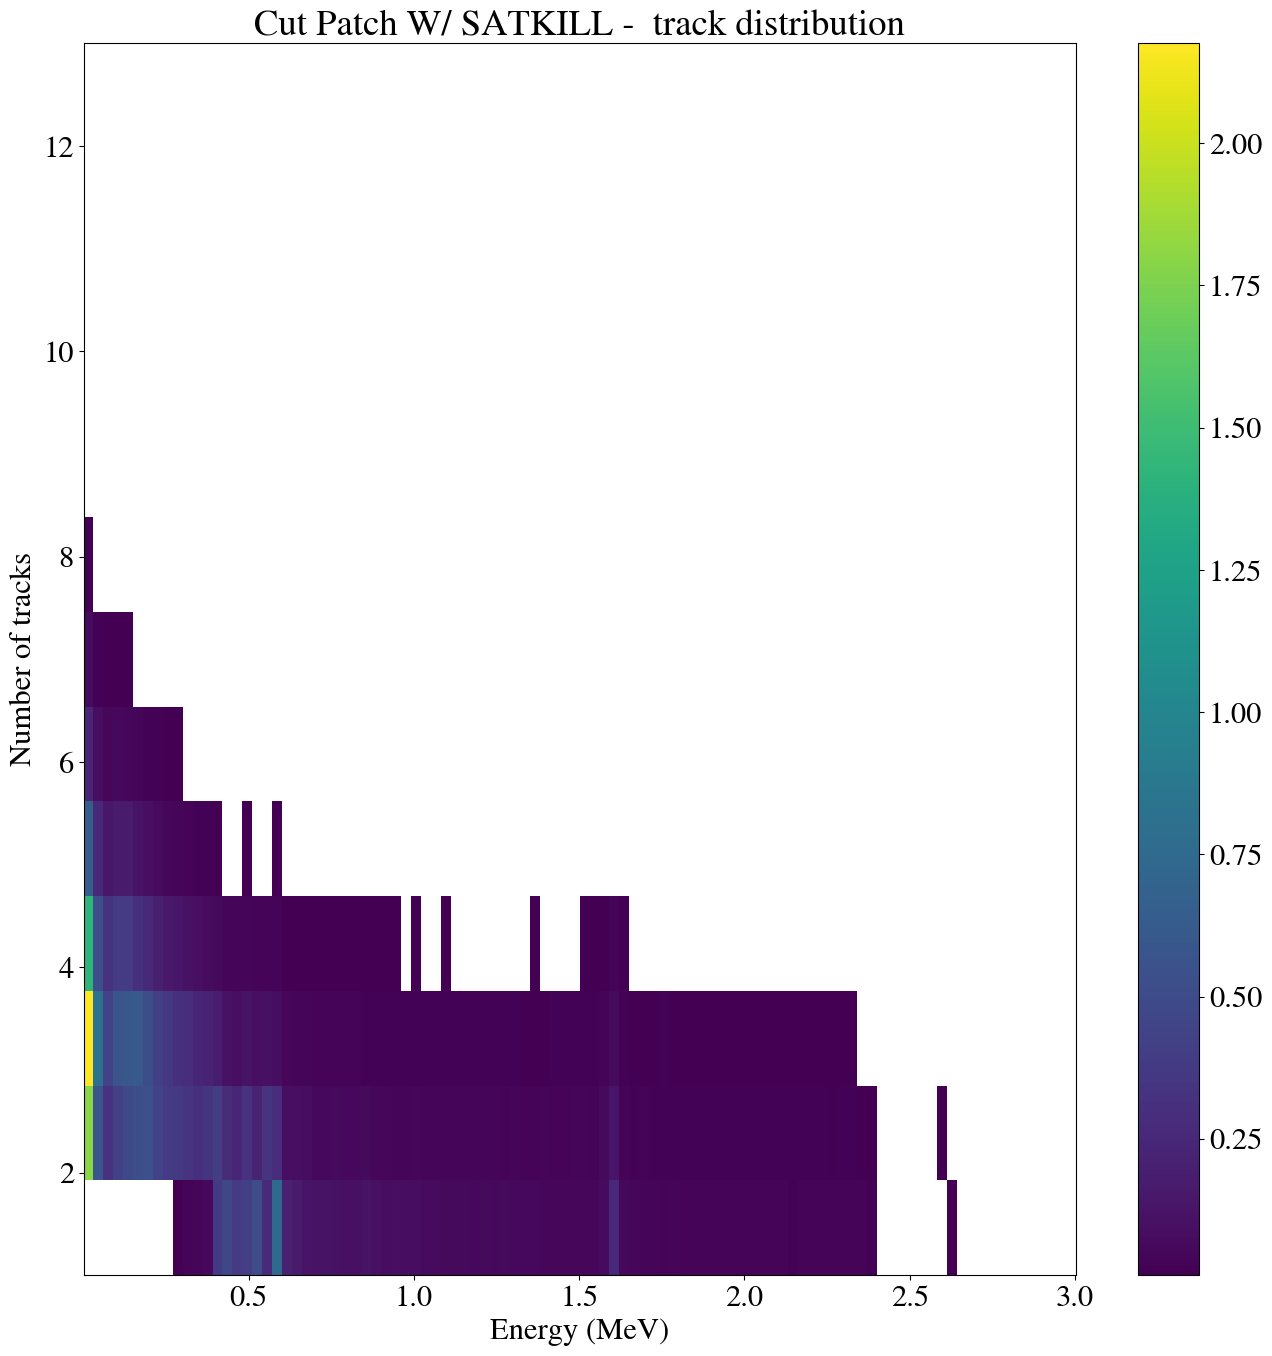

In [65]:
func.energy_track_plots(tracks_2, "Cut Patch W/ SATKILL -  track distribution", xbins = 100, ybins = np.max(tracks_2.numb_of_tracks.to_numpy()), weight = True, cm=0.01)

NameError: name 'tracks_es_duble' is not defined

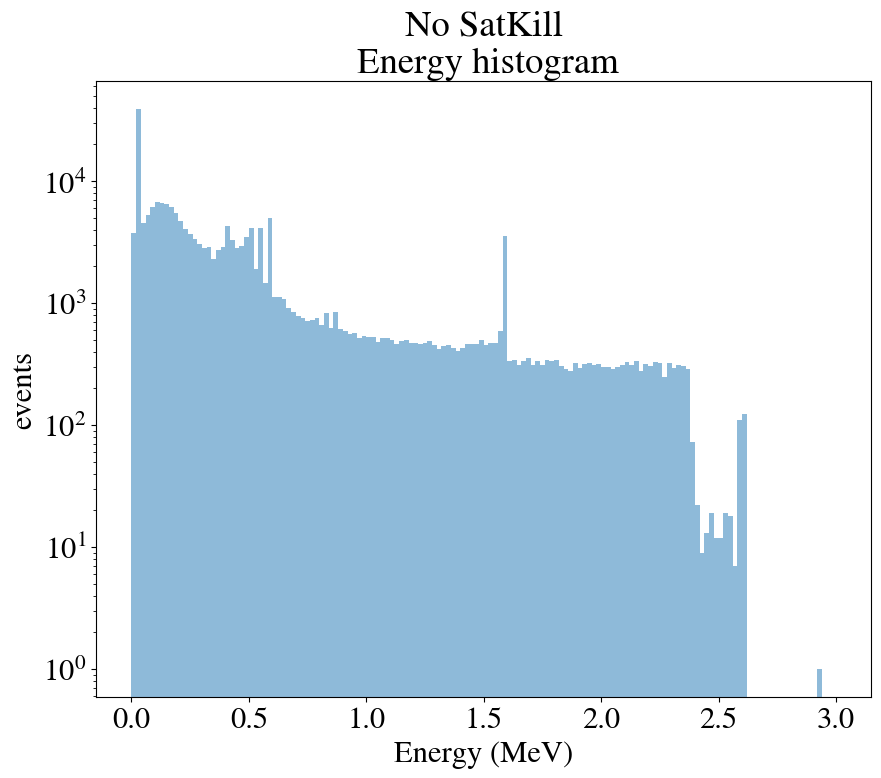

In [47]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Patch + SK\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'patch + satkill', alpha = 0.5, range = [0,3])


plt.legend()
plt.show()

NameError: name 'tracks_es_duble' is not defined

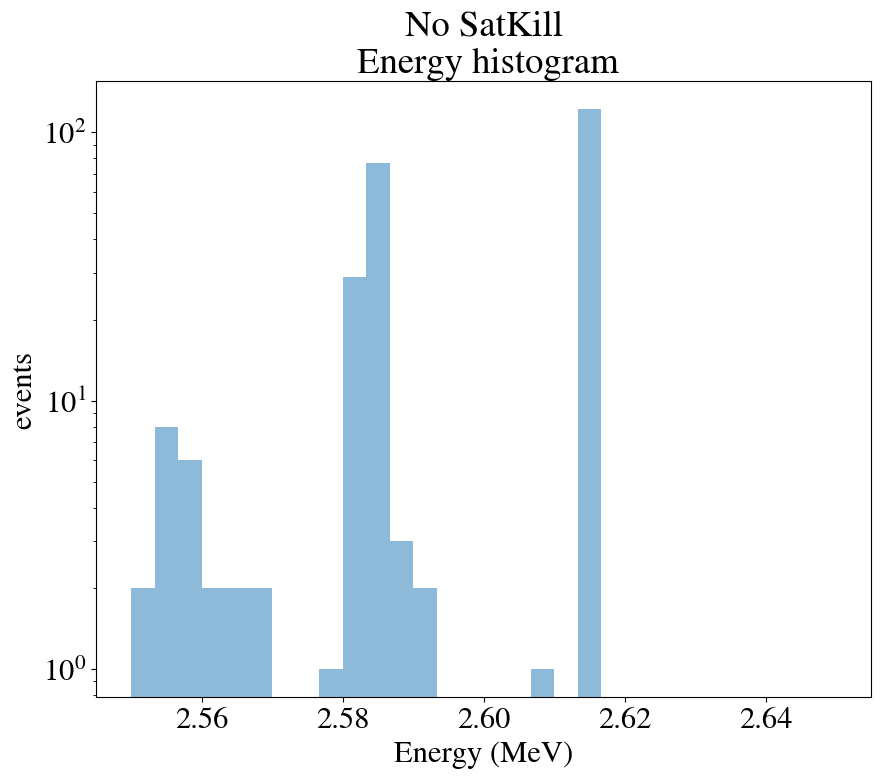

In [48]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 30, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [2.55,2.65])
func.plot_hist(tracks_es_duble, column = 'energy', binning = 30, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [2.55,2.65])
func.plot_hist(tracks_2, column = 'energy', binning = 30, title = 'Patch + SK\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'patch + satkill', alpha = 0.5, range = [2.55,2.65])


plt.legend()
plt.show()

In [66]:
test = 0

MC_Es = []
sat_Es = []

MC_norms_Es = []
normal_Es = []

# just taking the most energetic tracks


for (event, df) in tqdm(MC_tracks.groupby('event_id')):
    # Create X,Y positions for track energy by event ID for MC against satkill, allow multiple inputs if there are multiple inputs
    
    # order by energy, check if they have equal number of tracks in each, then make tuples
    
    df_sort = df.sort_values(by=['track_energy'], ascending=False)
    
    # satellite killer equivalent
    #df_tracks = tracks[tracks.event == event*2]
    #df_tracks = df_tracks.sort_values(by = ['energy'], ascending=False)
    
    # reco equivalent
    RECO_norm = tracks_2[tracks_2.event == event*2]
    RECO_norm = RECO_norm.sort_values(by = ['energy'], ascending=False)
    
    #if np.isclose(df_sort.track_energy.sum(), df_tracks.energy.sum(), atol = 0.01):
        
        #print(f"event: {event}")
        #display(df_sort)
        #print(f"Total energy: {df.track_energy.sum()} MeV")

        #display(df_tracks)
        #print(f"Total energy: {df_tracks.energy.sum()} MeV")
        
        ## save the highest energy track from each to compare
    #    MC_Es.append(df_sort.iloc[0].track_energy)
    #    sat_Es.append(df_tracks.iloc[0].energy)
    
    #if np.isclose(df_sort.track_energy.sum(), RECO_norm.energy.sum(), atol = 0.01):
    if not (RECO_norm.empty):
        MC_norms_Es.append(df_sort.iloc[0].track_energy)
        normal_Es.append(RECO_norm.iloc[0].energy)

100%|██████████| 100009/100009 [02:56<00:00, 565.68it/s]


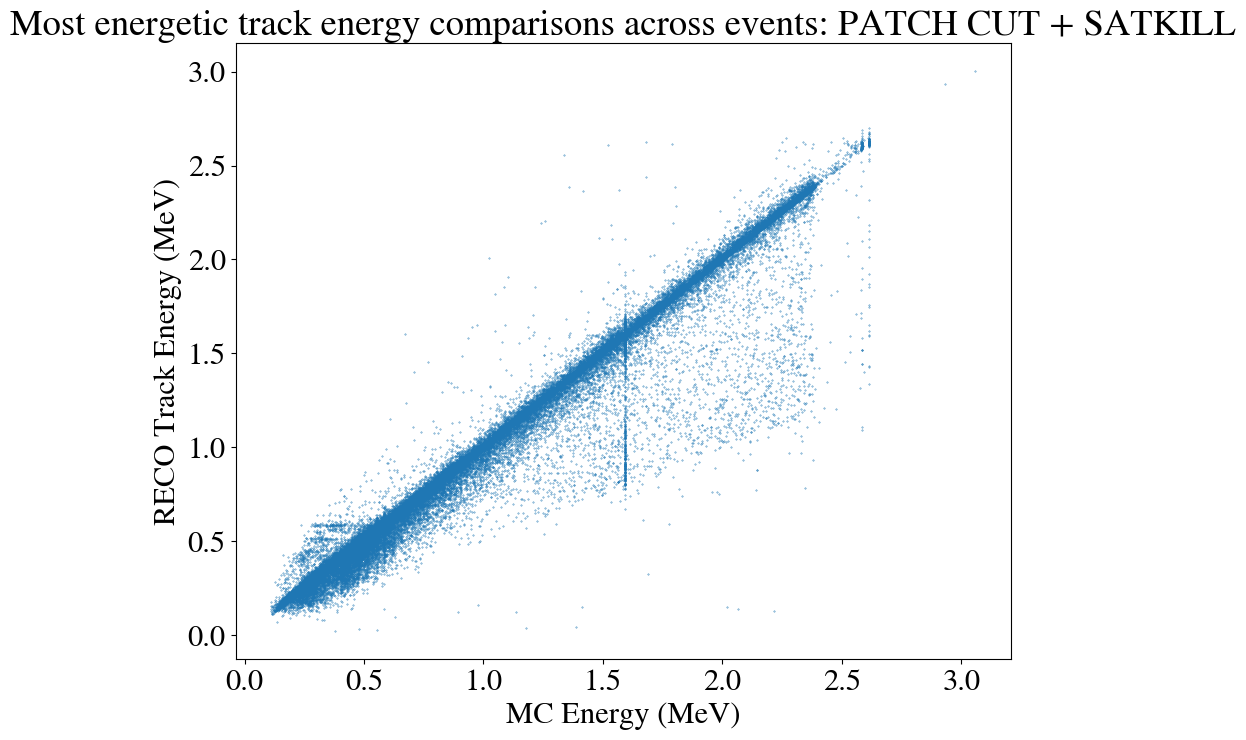

In [67]:
plt.scatter(MC_norms_Es, normal_Es, s = 0.1)
plt.xlabel('MC Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: PATCH CUT + SATKILL")
plt.show()

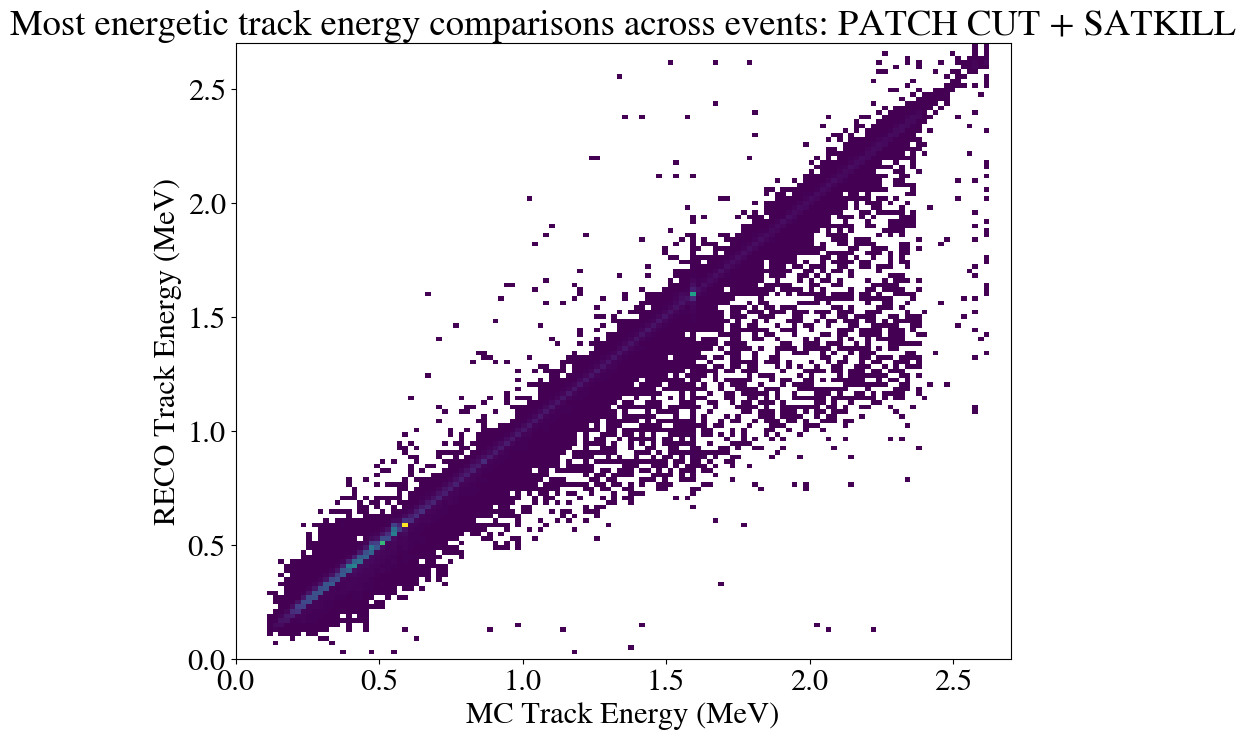

In [68]:
plt.hist2d(MC_norms_Es, normal_Es, bins = 150, cmin = 0.001)
plt.xlabel('MC Track Energy (MeV)')
plt.ylabel('RECO Track Energy (MeV)')
plt.title("Most energetic track energy comparisons across events: PATCH CUT + SATKILL")
plt.xlim([0,2.7])
plt.ylim([0,2.7])
plt.show()

### relative e_cut

In [77]:
# port type
prt = '1a'

# load in MC topology information
#MC_tracks = pd.read_hdf('nsk_sk_distros/MC_topology_info_' + prt + '.h5')
# for port 1a
MC_tracks = pd.read_hdf('nsk_sk_distros/MC_topology_info' + '.h5')

#folder_paths_patch = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/new_5e-3/PORT_' + prt + '/isaura/']
#tracks_2 = func.collate_ports(folder_paths_patch)

folder_paths_relative = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_' + prt + '/isaura/']
tracks_rel = func.collate_ports(folder_paths_relative)

folder_paths_raw = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_' + prt + '/isaura/']
tracks_raw = func.collate_ports(folder_paths_raw)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009
Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009


No limits applied


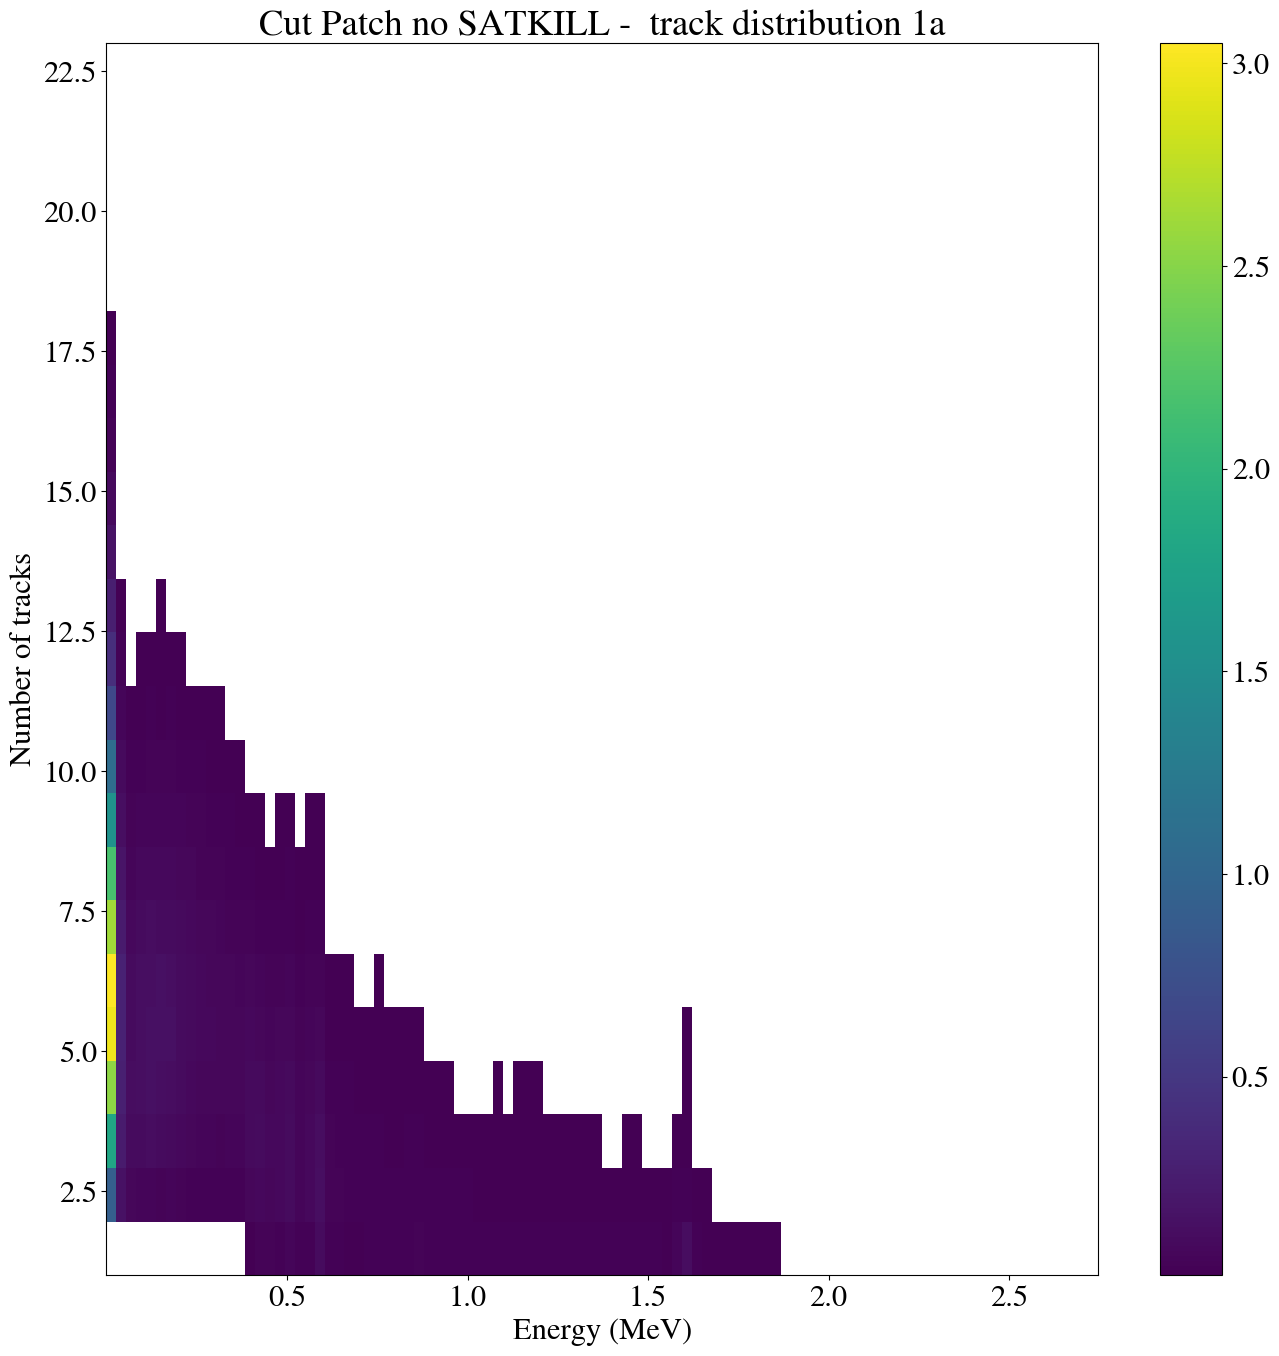

No limits applied


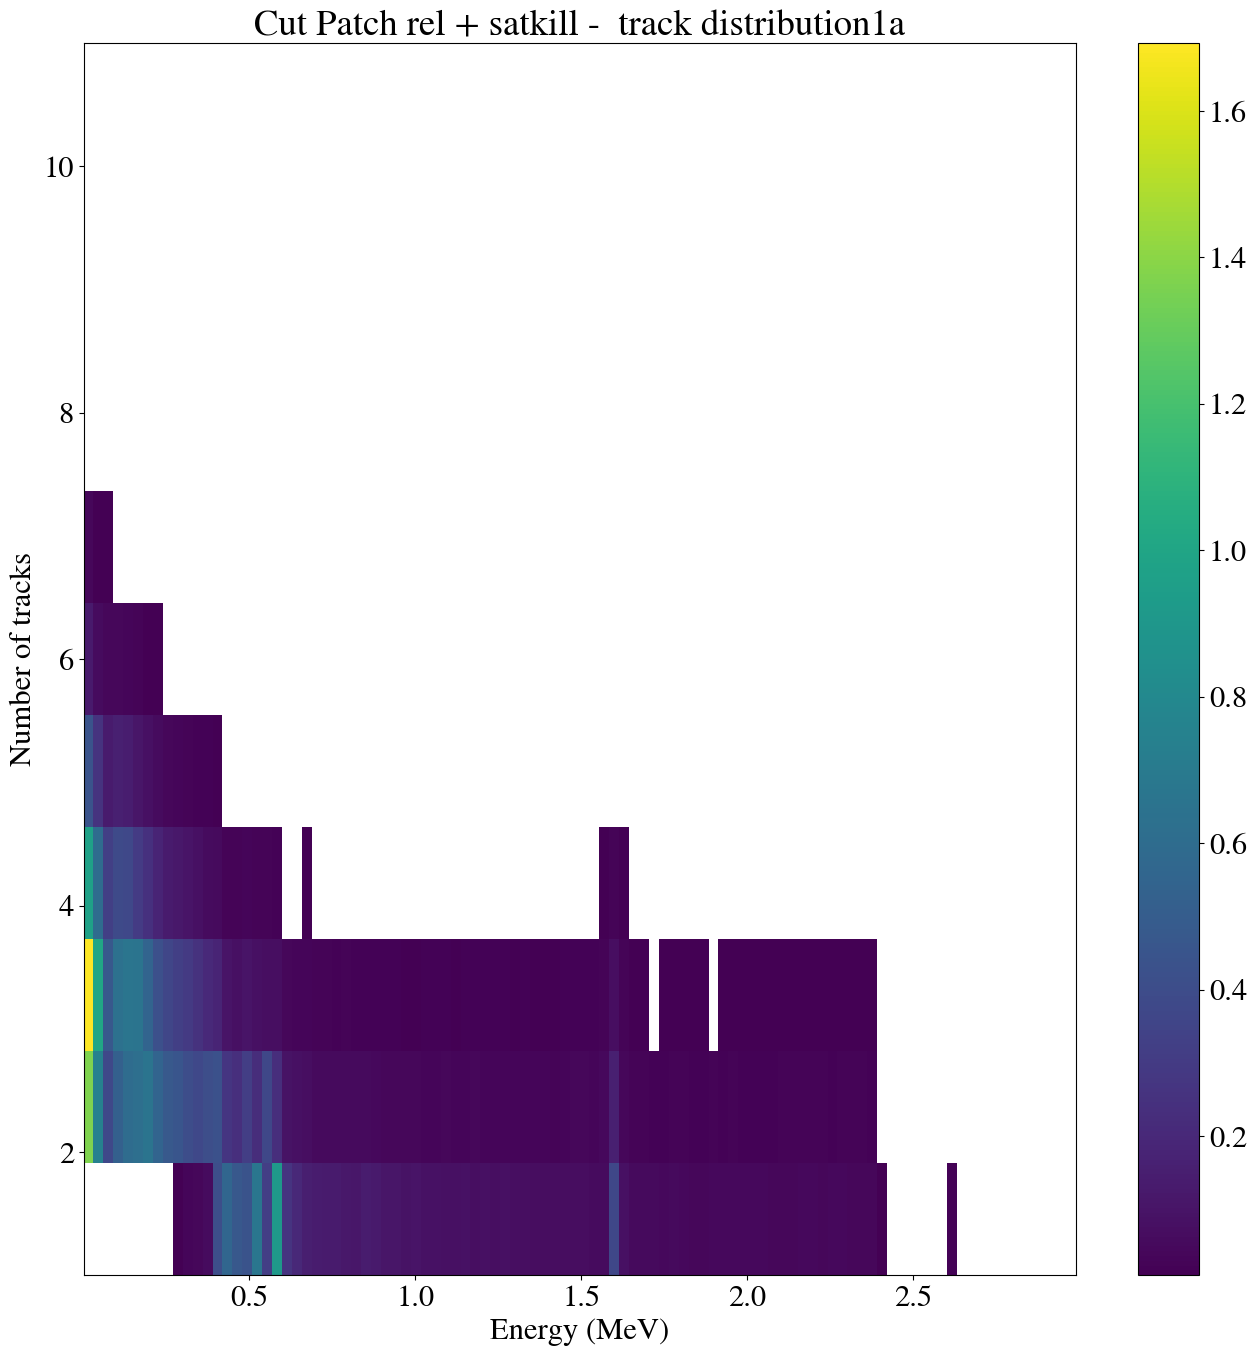

In [78]:
func.energy_track_plots(tracks_raw, "Cut Patch no SATKILL -  track distribution " + prt, xbins = 100, ybins = np.max(tracks_raw.numb_of_tracks.to_numpy()), weight = True, cm=0.01)
func.energy_track_plots(tracks_rel, "Cut Patch rel + satkill -  track distribution" + prt, xbins = 100, ybins = np.max(tracks_rel.numb_of_tracks.to_numpy()), weight = True, cm=0.01)

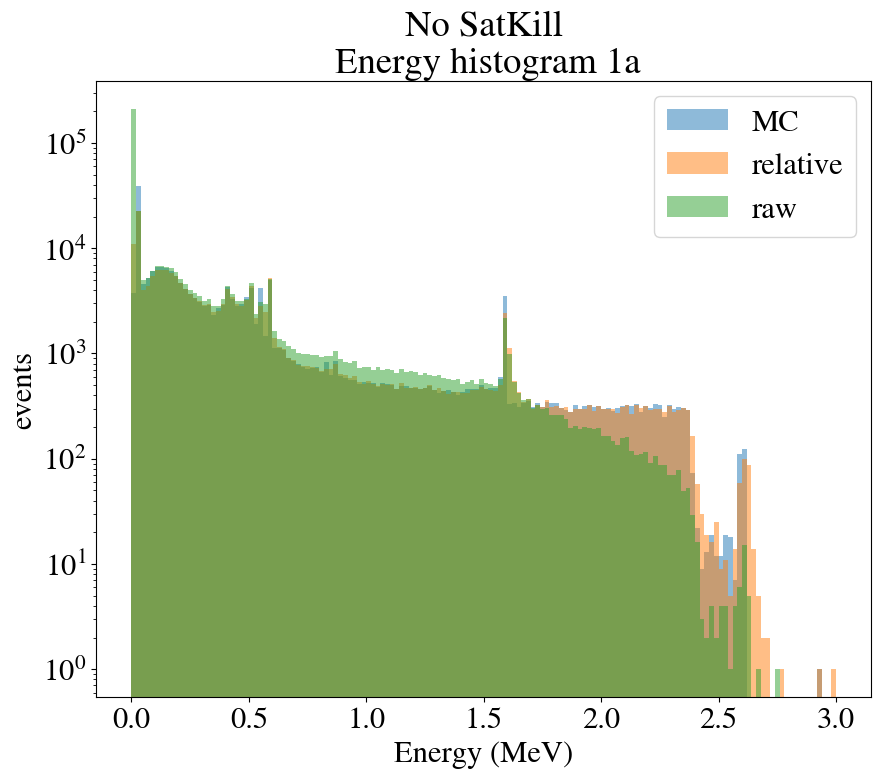

In [79]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_rel, column = 'energy', binning = 150, title = 'relative cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'relative', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_raw, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram ' + prt, output = False, x_label = 'Energy (MeV)', label = 'raw', alpha = 0.5, range = [0,3])



plt.legend()
plt.show()

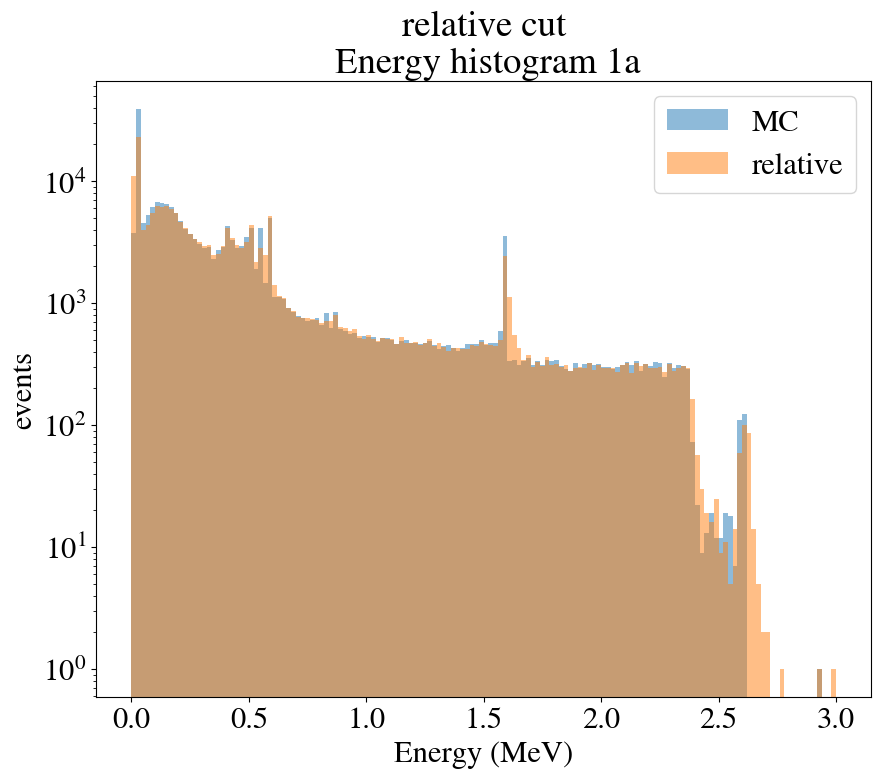

In [80]:


func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [0,3])
# edited out for now
#func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'patch + SK', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_rel, column = 'energy', binning = 150, title = 'relative cut\n Energy histogram ' + prt, output = False, x_label = 'Energy (MeV)', label = 'relative', alpha = 0.5, range = [0,3])

plt.legend()
plt.show()

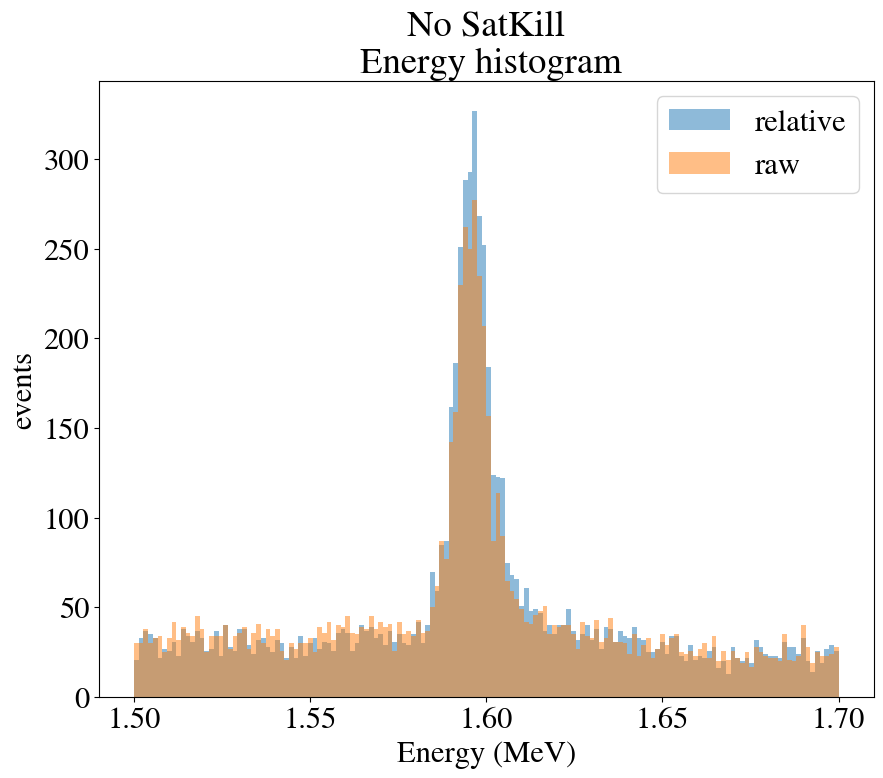

In [81]:
#func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [1.5,1.7], log = False)
func.plot_hist(tracks_rel, column = 'energy', binning = 150, title = 'relative cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'relative', alpha = 0.5, range = [1.5,1.7], log = False)
func.plot_hist(tracks_raw, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'raw', alpha = 0.5, range = [1.5,1.7], log = False)
# edited out for now
#func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Energy histogram ' + prt, output = False, x_label = 'Energy (MeV)', label = 'patch + SK', alpha = 0.5, range = [1.5,1.7], log = False)



plt.legend()
plt.show()

### lets do the cuts to see if the peak is kept

In [82]:
print("============================")
print("         REL TRACKS         ")
print("============================")
rel_cuts = func.apply_cuts(tracks_rel, r_lim = 415)
print("============================")
print("         RAW TRACKS         ")
print("============================")
raw_cuts = func.apply_cuts(tracks_raw, r_lim = 415)
print("============================")
print("     ABS+PATCH TRACKS       ")
print("============================")
print("left out for now")
#patch_cuts = func.apply_cuts(tracks_2, r_lim = 415)

         REL TRACKS         
Cutting events around fiducial volume related to:
Z range between 20 and 1195
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 42.66 %
Absolute Cut efficiency:
Efficiency: 42.66 %
One track cut
Relative Cut efficiency:
Efficiency: 53.24 %
Absolute Cut efficiency:
Efficiency: 45.49 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 80.17 %
Absolute Cut efficiency:
Efficiency: 69.08 %
Energy cut
Relative Cut efficiency:
Efficiency: 11.16 %
Absolute Cut efficiency:
Efficiency: 7.12 %
         RAW TRACKS         
Cutting events around fiducial volume related to:
Z range between 20 and 1195
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 39.81 %
Absolute Cut efficiency:
Efficiency: 39.81 %
One track cut
Relative Cut efficiency:
Efficiency: 21.34 %
Absolute Cut efficiency:
Efficiency: 18.16 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 95.42 %
Absolute Cut efficiency:
Efficiency: 74.49 %
Energy c

In [83]:
print("============================")
print("         REL TRACKS         ")
print("============================")
display(rel_cuts[1])
print("============================")
print("         RAW TRACKS         ")
print("============================")
display(raw_cuts[1])
print("============================")
print("     ABS+PATCH TRACKS       ")
print("============================")
print("left out for now")
#display(patch_cuts[1])

         REL TRACKS         


,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,No cuts,100.000000,100009,100.000000
1,Fiducial Cuts,42.660161,42664,42.660161
2,One track cut,53.236921,22713,45.486906
3,Blob overlap cuts,80.169947,18209,69.077783
4,Energy cuts,11.164809,2033,7.123359


         RAW TRACKS         


,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,No cuts,100.000000,100009,100.000000
1,Fiducial Cuts,39.811417,39815,39.811417
2,One track cut,21.343715,8498,18.162365
3,Blob overlap cuts,95.422452,8109,74.490296
4,Energy cuts,20.162782,1635,6.914378


     ABS+PATCH TRACKS       
left out for now


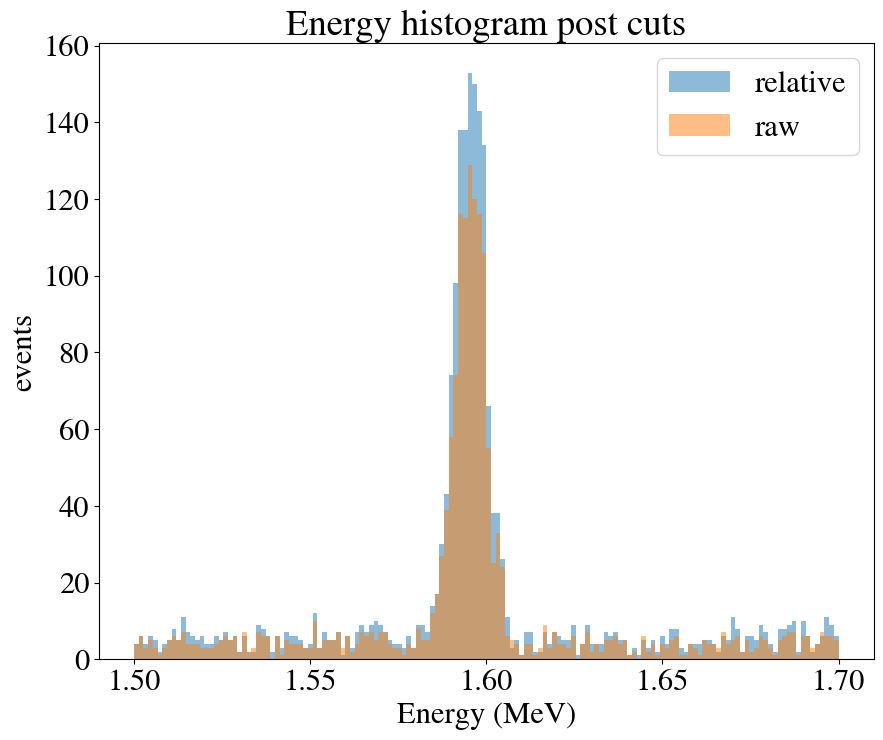

In [84]:
#func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 0.5, range = [1.5,1.7], log = False)
func.plot_hist(rel_cuts[0], column = 'energy', binning = 150, title = 'relative cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'relative', alpha = 0.5, range = [1.5,1.7], log = False)
func.plot_hist(raw_cuts[0], column = 'energy', binning = 150, title = 'Energy histogram post cuts', output = False, x_label = 'Energy (MeV)', label = 'raw', alpha = 0.5, range = [1.5,1.7], log = False)
#func.plot_hist(patch_cuts[0], column = 'energy', binning = 150, title = 'Energy histogram post cuts ' + prt, output = False, x_label = 'Energy (MeV)', label = 'patch+abs', alpha = 0.5, range = [1.5,1.7], log = False)



plt.legend()
plt.show()

In [85]:
#display(signal_tracks)
#print(signal_tracks.event_id.nunique())

In [86]:
signal_tracks = pd.read_hdf('soph_df_data/' + prt + '_Tl_signal_true_info.h5')

# alter signal tracks to match the current r-range
r_lim = 415

# events outside of the fiducial range.
signal_tracks_oor = signal_tracks[np.sqrt(signal_tracks.x**2 + signal_tracks.y**2) > r_lim]
signal_tracks_ooz = signal_tracks[signal_tracks.z > 1170]
signal_tracks_uuz = signal_tracks[signal_tracks.z < 20]

oor = signal_tracks_oor.event_id.nunique()
ooz = signal_tracks_ooz.event_id.nunique()
uuz = signal_tracks_uuz.event_id.nunique()
print(oor, ooz, uuz)
#print(signal_tracks_ooz.event_id.nunique())
#print(signal_tracks_uuz.event_id.nunique())

# remove the events outwith the fiducial volume
signal_tracks_r = signal_tracks[~signal_tracks.event_id.isin(signal_tracks_oor.event_id.unique())]
signal_tracks_r = signal_tracks_r[~signal_tracks_r.event_id.isin(signal_tracks_ooz.event_id.unique())]
signal_tracks_r = signal_tracks_r[~signal_tracks_r.event_id.isin(signal_tracks_uuz.event_id.unique())]
print(signal_tracks_r.event_id.nunique())

3389 499 104
2529


In [87]:
# The monte carlo true information
MC_signal = np.intersect1d(signal_tracks_r.event_id.unique(),MC_tracks.event_id.unique())
MC_signal = MC_tracks[MC_tracks.event_id.isin(MC_signal)]
display(MC_signal)
#print(MC_signal.event_id.nunique())

,event_id,track_ID,track_energy,numb_of_tracks
25,80009,0,1.561924,2
26,80009,1,0.030583,2
126,80056,0,1.592507,1
151,80071,0,1.592507,1
361,80184,0,1.592507,1
...,...,...,...,...
200927,2990181,0,0.356905,4
200928,2990181,1,0.068792,4
200929,2990181,2,0.898891,4
200930,2990181,3,0.029781,4


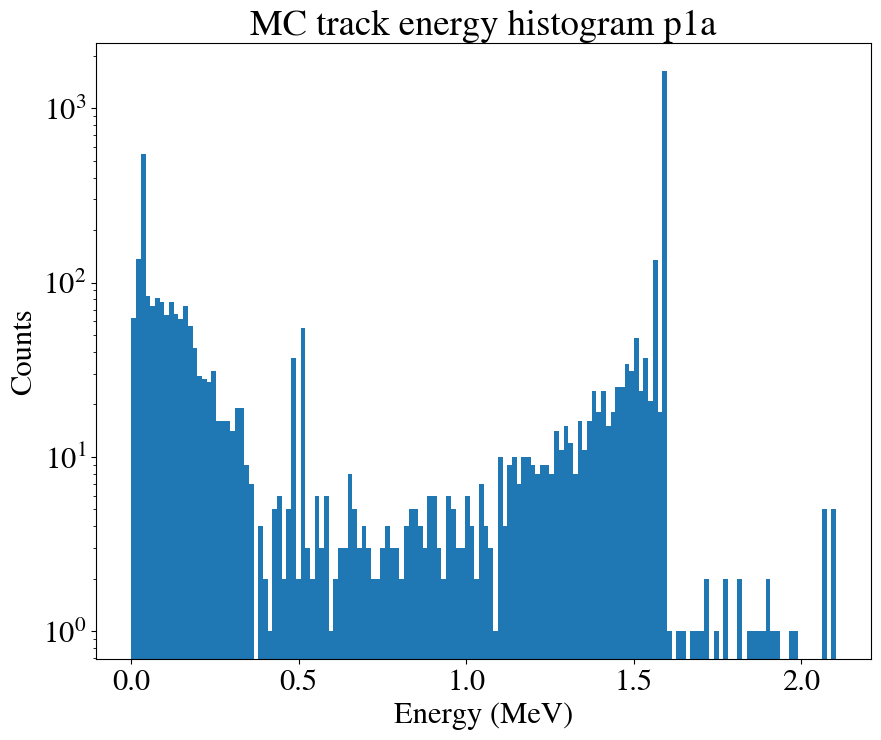

In [88]:
plt.hist(MC_signal.track_energy.to_numpy(), bins = 150)
plt.title('MC track energy histogram p' + prt )
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.yscale('log')
plt.show()

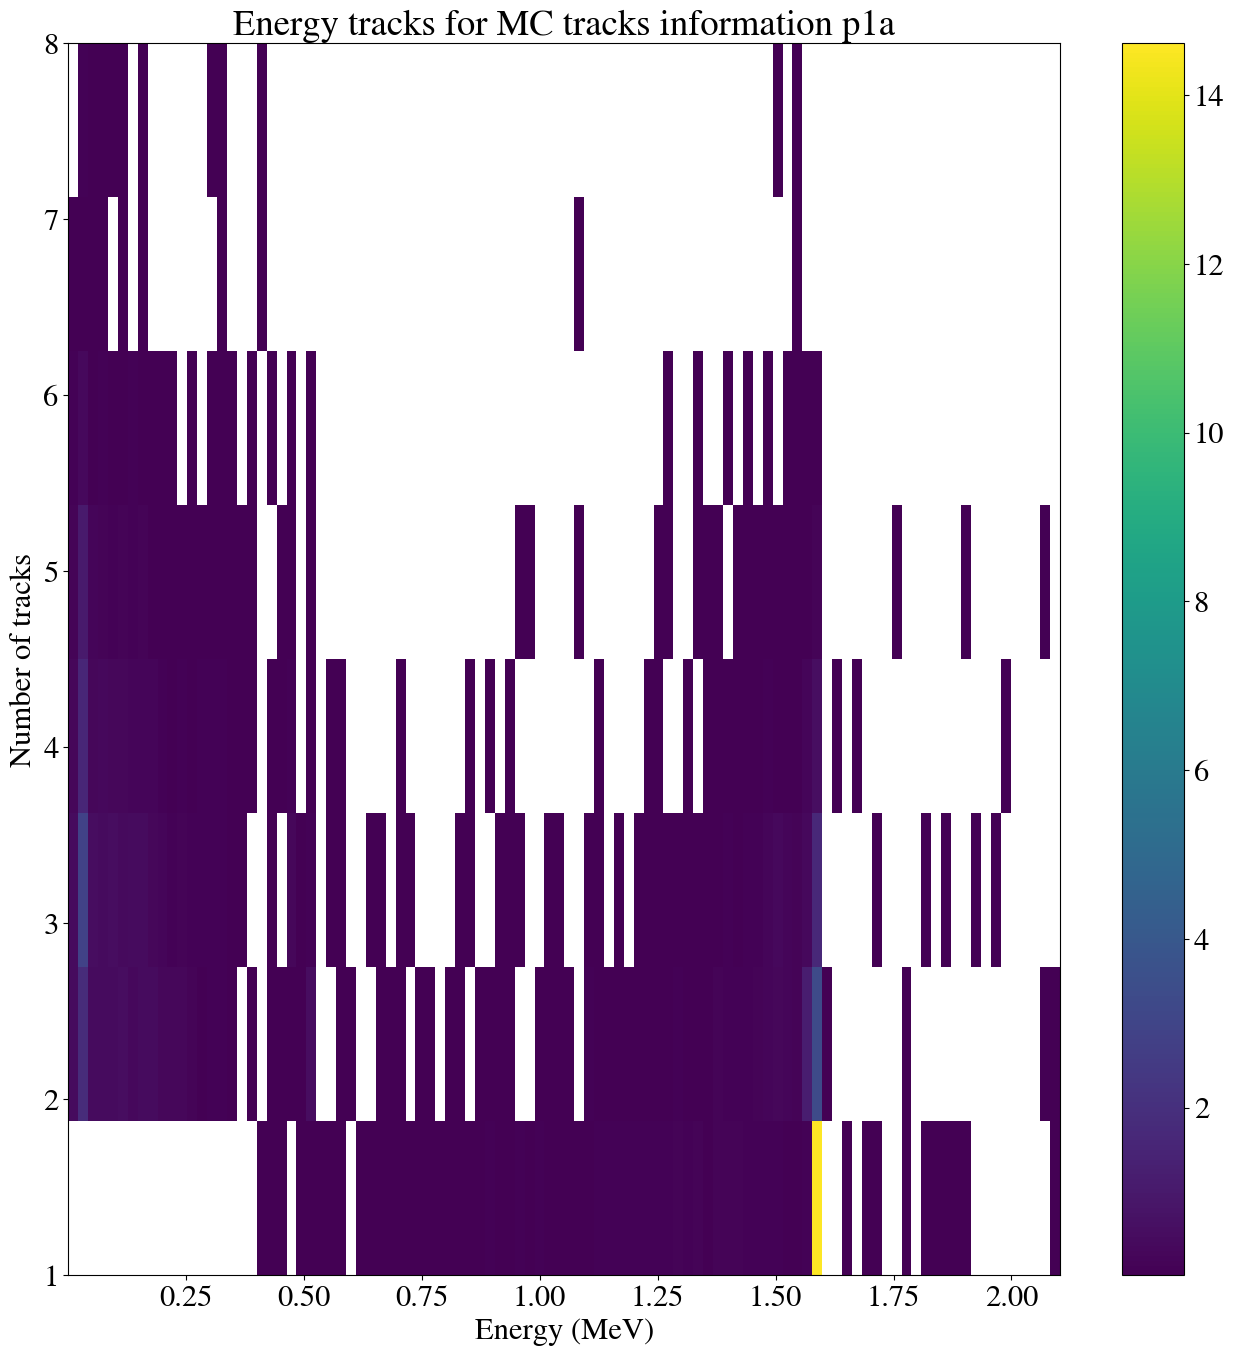

In [89]:
#xbins = 100, ybins = 
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(16, 16))    
hist1 = axes.hist2d(MC_signal.track_energy.to_numpy(), MC_signal.numb_of_tracks.to_numpy(), bins=(100, np.max(MC_signal.numb_of_tracks.to_numpy())), density=True, cmin = 0.001)
plt.title('Energy tracks for MC tracks information p' + prt)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of tracks')
fig.colorbar(hist1[3], ax = axes)
plt.show()

In [90]:
# how many 1-track events in our region of interest are there?
selection = MC_signal[MC_signal.numb_of_tracks == 1]
sel_gt = selection[selection.track_energy > 1.5]
sel_lt = sel_gt[sel_gt.track_energy < 1.7]
print(sel_lt.event_id.nunique())

display(sel_lt)

1197


,event_id,track_ID,track_energy,numb_of_tracks
126,80056,0,1.592507,1
151,80071,0,1.592507,1
361,80184,0,1.592507,1
755,20050,0,1.592507,1
1151,20259,0,1.592507,1
...,...,...,...,...
200278,2980201,0,1.592507,1
200444,2980278,0,1.592507,1
200543,2980331,0,1.592507,1
200874,2990155,0,1.592507,1


In [91]:
# get a cross-over to count how many events are true signal
rel_count_true_signal = np.intersect1d(MC_signal.event_id.unique(), rel_cuts[0].event.unique()//2)
rel_count_true_signal = rel_cuts[0][rel_cuts[0].event.isin(rel_count_true_signal*2)]
display(rel_count_true_signal.event.nunique())

raw_count_true_signal = np.intersect1d(MC_signal.event_id.unique(), raw_cuts[0].event.unique()//2)
raw_count_true_signal = raw_cuts[0][raw_cuts[0].event.isin(raw_count_true_signal*2)]
display(raw_count_true_signal.event.nunique())

#patch_count_true_signal = np.intersect1d(MC_signal.event_id.unique(), patch_cuts[0].event.unique()//2)
#patch_count_true_signal = patch_cuts[0][patch_cuts[0].event.isin(patch_count_true_signal*2)]
#display(patch_count_true_signal.event.nunique())



1169

957

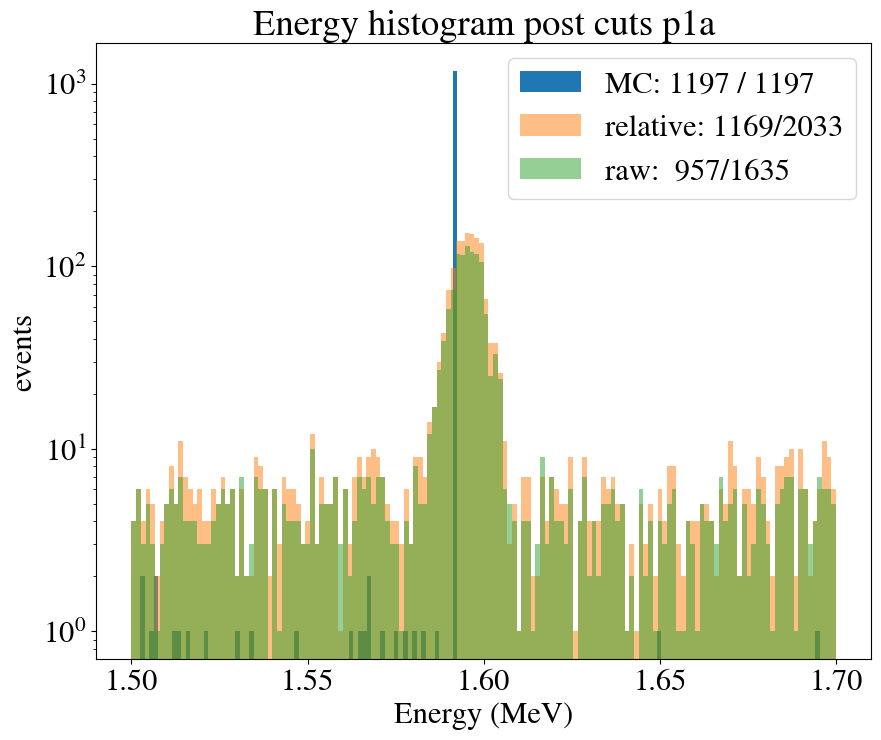

In [92]:
plt.hist(sel_lt.track_energy.to_numpy(), bins = 150, label = f'MC: {sel_lt.event_id.nunique()} / {sel_lt.event_id.nunique()}')
func.plot_hist(rel_cuts[0], column = 'energy', binning = 150, title = 'relative cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = f'relative: {rel_count_true_signal.event.nunique()}/{rel_cuts[0].event.nunique()}', alpha = 0.5, range = [1.5,1.7], log = False)
func.plot_hist(raw_cuts[0], column = 'energy', binning = 150, title = 'Energy histogram post cuts p' + prt, output = False, x_label = 'Energy (MeV)', label = f'raw:  {raw_count_true_signal.event.nunique()}/{raw_cuts[0].event.nunique()}', alpha = 0.5, range = [1.5,1.7], log = False)
#func.plot_hist(patch_cuts[0], column = 'energy', binning = 150, title = 'Energy histogram post cuts', output = False, x_label = 'Energy (MeV)', label = f'patch:  {patch_count_true_signal.event.nunique()}/{patch_cuts[0].event.nunique()}', alpha = 0.5, range = [1.5,1.7], log = False)
plt.yscale('log')
plt.legend()
plt.show()

In [93]:
rel_cuts_1a = rel_cuts[0]
raw_cuts_1a = raw_cuts[0]
#rel_cuts_1b = rel_cuts[0]
#raw_cuts_1b = raw_cuts[0]
#rel_cuts_2a = rel_cuts[0]
#raw_cuts_2a = raw_cuts[0]
#rel_cuts_2b = rel_cuts[0]
#raw_cuts_2b = raw_cuts[0]
print("this ones done! " + prt)

this ones done! 1a


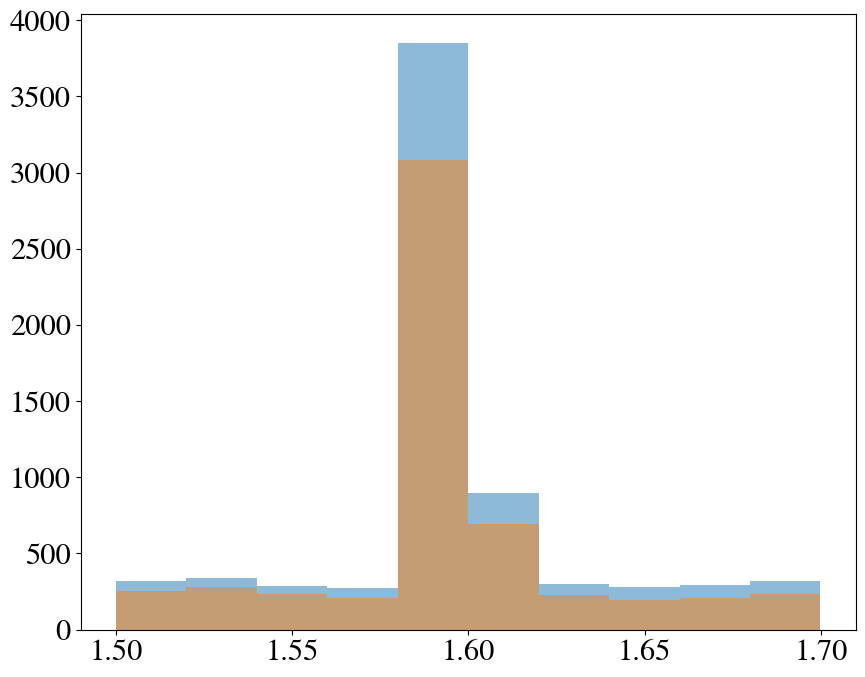

In [96]:
rel_Es = []
raw_Es = []

rel_Es.append(rel_cuts_1a.energy.to_list())
rel_Es.append(rel_cuts_1b.energy.to_list())
rel_Es.append(rel_cuts_2a.energy.to_list())
rel_Es.append(rel_cuts_2b.energy.to_list())

raw_Es.append(raw_cuts_1a.energy.to_list())
raw_Es.append(raw_cuts_1b.energy.to_list())
raw_Es.append(raw_cuts_2a.energy.to_list())
raw_Es.append(raw_cuts_2b.energy.to_list())


def flatten(xss):
    return [x for xs in xss for x in xs]

raw_Es = flatten(raw_Es)
rel_Es = flatten(rel_Es)



In [ ]:
binning = 100

plt.hist(rel_Es, alpha =0.7, label = 'post-changes', bins = binning)
plt.hist(raw_Es, alpha =0.7, label = 'pre-changes', bins = binning)
plt.xlabel('Energy (MeV)')
plt.ylabel('Counts')
plt.title('Energy distribution post-isaura cuts')
plt.legend()
#plt.axvspan(1.58, 1.61, alpha = 0.2, color = 'r')
plt.show()

In [100]:
np.save('post_cut_energy.npy', np.array(rel_Es))
np.save('pre_cut_energy.npy', np.array(raw_Es))

In [110]:
relevant_Es = np.array(rel_Es)[np.array(rel_Es) < 1.61]
relevant_Es = np.array(relevant_Es)[np.array(relevant_Es) > 1.58]
print(len(rel_Es), len(relevant_Es))

rawlevant_Es = np.array(raw_Es)[np.array(raw_Es) < 1.61]
rawlevant_Es = np.array(rawlevant_Es)[np.array(rawlevant_Es) > 1.58]
print(len(raw_Es), len(rawlevant_Es))


7152 4605
5615 3672


### plots for CM meeting 09/24

In [71]:
folder_paths_relative = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_1a/isaura/']
tracks_2 = func.collate_ports(folder_paths_relative)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/rel_0.2_new/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 100009


In [72]:
folder_paths_dodgy = ['/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/isaura/']
tracks_dodge = func.collate_ports(folder_paths_dodgy)

Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/satkill/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87225


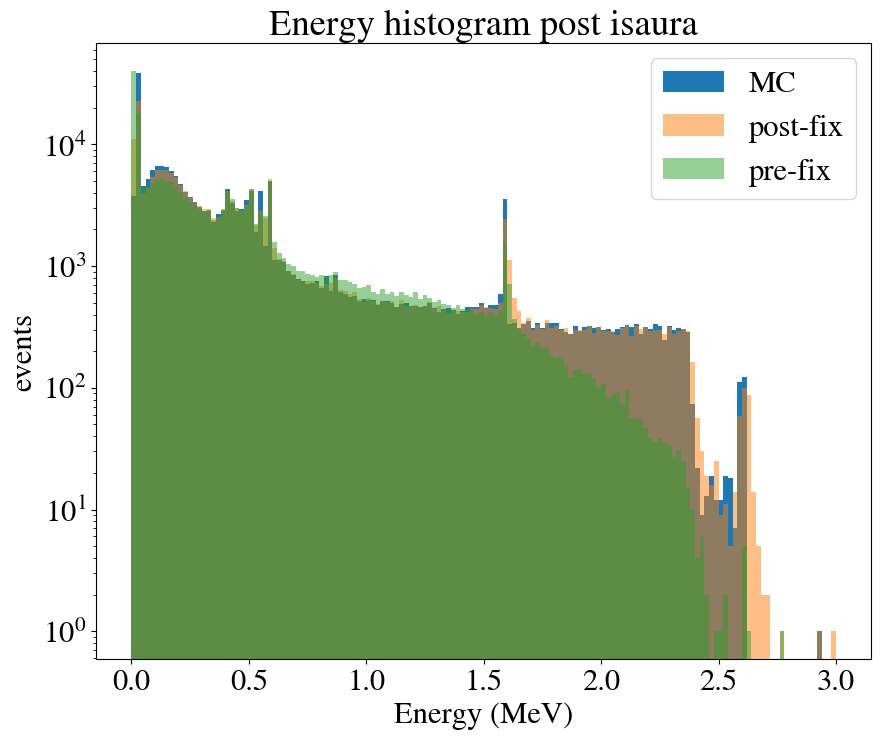

In [77]:
func.plot_hist(MC_tracks, column = 'track_energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'MC', alpha = 1, range = [0,3])
#func.plot_hist(tracks_es_duble, column = 'energy', binning = 150, title = 'No SatKill\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'esmeralda', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_2, column = 'energy', binning = 150, title = 'Relative e_cut\n Energy histogram', output = False, x_label = 'Energy (MeV)', label = 'post-fix', alpha = 0.5, range = [0,3])
func.plot_hist(tracks_dodge, column = 'energy', binning = 150, title = 'Energy histogram post isaura', output = False, x_label = 'Energy (MeV)', label = 'pre-fix', alpha = 0.5, range = [0,3])



plt.legend()
plt.show()